In [5]:
import numpy as np
import scipy as sc
import matplotlib as mpl
import matplotlib.pyplot as plt
#from all_functions_mod import standartize_figure, make_border
import pickle
from scipy.integrate import quad, dblquad
from scipy.misc import derivative
from scipy.interpolate import interp1d
from scipy.optimize import fmin_tnc, curve_fit, minimize
import mpmath as mp
from SourcesTBG import *

# DoS functions

We start with the low-energy Hamiltonian of single layer graphene in rotated coordinate frame:
\begin{align}
	h_{\theta}^{K'}(\vec{k})=v_F k\left[\begin{array}{cc}
		0 & e^{i\left(\theta_{\mathbf{k}}-\theta\right)} \\
		e^{-i\left(\theta_{\mathbf{k}}-\theta\right)} & 0
	\end{array}\right]\equiv v_F \left[\begin{array}{cc}
	0 & (k_x+i k_y) e^{-i\theta} \\
	(k_x-i k_y) e^{i\theta} & 0
\end{array}\right]
\end{align}
where $\theta$ is the rotation angle.
Next we define the three vectors:
\begin{align}
	&\mathbf{q}_{1}=\mathbf{K}_{D}^{(2)}-\mathbf{K}_{D}^{(1)}=k_{\theta}\{0,-1\} \\
	&\mathbf{q}_{2}=\mathbf{K}_{D}^{(2)}+\mathbf{G}_{1}^{(2)}-\mathbf{K}_{D}^{(1)}-\mathbf{G}_{1}^{(1)}=k_{\theta}\left\{\frac{\sqrt{3}}{2}, \frac{1}{2}\right\} \\
	&\mathbf{q}_{3}=\mathbf{K}_{D}^{(2)}-\mathbf{G}_{2}^{(2)}-\mathbf{K}_{D}^{(1)}+\mathbf{G}_{2}^{(1)}=k_{\theta}\left\{-\frac{\sqrt{3}}{2}, \frac{1}{2}\right\}
\end{align}
with rotation k-modulus
\begin{align}
	k_{\theta}=\left|\mathbf{q}_{j}\right|=\frac{8 \pi}{3 \sqrt{3} a} \sin \left(\frac{\theta}{2}\right)
\end{align}

The explicit form of the tunneling matrices is 

\begin{align}
	&T_{1}=\left(\begin{array}{cc}
		1 & 1 \\
		1 & 1
	\end{array}\right)=1+\sigma_{x}, \\
	&T_{2}=\left(\begin{array}{cc}
		1 & -\frac{1}{2}+i \frac{\sqrt{3}}{2} \\
		-\frac{1}{2}-i \frac{\sqrt{3}}{2} & 1
	\end{array}\right)=1-\frac{1}{2} \sigma_{x}-\frac{\sqrt{3}}{2} \sigma_{y}, \\
	&T_{3}=\left(\begin{array}{cc}
		1 & -\frac{1}{2}-i \frac{\sqrt{3}}{2} \\
		-\frac{1}{2}+i \frac{\sqrt{3}}{2} & 1
	\end{array}\right)=1-\frac{1}{2} \sigma_{x}+\frac{\sqrt{3}}{2} \sigma_{y} .
\end{align}
Thus, the Hamiltonian describing the TBG in the vicinity of the K point reads as
\begin{align}
	H(\mathbf{k})=\left(\begin{array}{cccc}
		h_{\theta / 2}^{K}(\mathbf{k}) & w T_{1} & w T_{2} & w T_{3} \\
		w T_{1}^{\dagger} & h_{-\theta / 2}^{K}\left(\mathbf{k}-\mathbf{q}_{1}\right) & 0 & 0 \\
		w T_{2}^{\dagger} & 0 & h_{-\theta / 2}^{K}\left(\mathbf{k}-\mathbf{q}_{2}\right) & 0 \\
		w T_{3}^{\dagger} & 0 & 0 & h_{-\theta / 2}^{K}\left(\mathbf{k}-\mathbf{q}_{3}\right)
	\end{array}\right)
\end{align}
To make the spectrum particle-hole symmetric we should ignore the rotations $\pm \theta/2$ in the single layer Hamiltonians. The angle is still present in the q-vectors.

## Checking the selection of proper coordinate grid in hexagon

Integration for DoS goes in the hexagon to properly take into account the triangle symmetry of the model

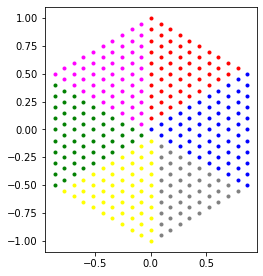

In [42]:
interval_size = 1.0
Np = 10
b1 = np.array([interval_size*np.sqrt(3)/2.0, -interval_size/2.0])
b2 = np.array([interval_size*np.sqrt(3)/2.0, interval_size/2.0])
b3 = np.array([0.0, interval_size])
b4 = - b1
b5 = - b2
b6 = - b3

rhombus_kx_1 = [b1[0]*b1i/Np+b2[0]*b2i/Np for b1i in range(Np+1) for b2i in range(Np+1) if b1i+b2i<=Np]
rhombus_ky_1 = [b1[1]*b1i/Np+b2[1]*b2i/Np for b1i in range(Np+1) for b2i in range(Np+1) if b1i+b2i<=Np]

rhombus_kx_2 = [b2[0]*b1i/Np+b3[0]*b2i/Np for b1i in range(Np+1) for b2i in range(1,Np+1) if b1i+b2i<=Np]
rhombus_ky_2 = [b2[1]*b1i/Np+b3[1]*b2i/Np for b1i in range(Np+1) for b2i in range(1,Np+1) if b1i+b2i<=Np]

rhombus_kx_3 = [b3[0]*b1i/Np+b4[0]*b2i/Np for b1i in range(Np+1) for b2i in range(1,Np+1) if b1i+b2i<=Np]
rhombus_ky_3 = [b3[1]*b1i/Np+b4[1]*b2i/Np for b1i in range(Np+1) for b2i in range(1,Np+1) if b1i+b2i<=Np]

rhombus_kx_4 = [b4[0]*b1i/Np+b5[0]*b2i/Np for b1i in range(Np+1) for b2i in range(1,Np+1) if b1i+b2i<=Np]
rhombus_ky_4 = [b4[1]*b1i/Np+b5[1]*b2i/Np for b1i in range(Np+1) for b2i in range(1,Np+1) if b1i+b2i<=Np]

rhombus_kx_5 = [b5[0]*b1i/Np+b6[0]*b2i/Np for b1i in range(Np+1) for b2i in range(1,Np+1) if b1i+b2i<=Np]
rhombus_ky_5 = [b5[1]*b1i/Np+b6[1]*b2i/Np for b1i in range(Np+1) for b2i in range(1,Np+1) if b1i+b2i<=Np]

rhombus_kx_6 = [b6[0]*b1i/Np+b1[0]*b2i/Np for b1i in range(1,Np+1) for b2i in range(1,Np+1) if b1i+b2i<=Np]
rhombus_ky_6 = [b6[1]*b1i/Np+b1[1]*b2i/Np for b1i in range(1,Np+1) for b2i in range(1,Np+1) if b1i+b2i<=Np]


fig = plt.subplot(111,aspect=1.0)
plt.plot(rhombus_kx_1, rhombus_ky_1, '.', color='blue')
plt.plot(rhombus_kx_2, rhombus_ky_2, '.', color='red')
plt.plot(rhombus_kx_3, rhombus_ky_3, '.', color='magenta')
plt.plot(rhombus_kx_4, rhombus_ky_4, '.', color='green')
plt.plot(rhombus_kx_5, rhombus_ky_5, '.', color='yellow')
plt.plot(rhombus_kx_6, rhombus_ky_6, '.', color='gray')
plt.show()

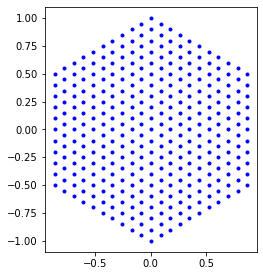

In [44]:
#contruction of the properly filled hexagon grid

interval_size = 1.0
Np = 10
b1 = np.array([interval_size*np.sqrt(3)/2.0, -interval_size/2.0])
b2 = np.array([interval_size*np.sqrt(3)/2.0, interval_size/2.0])
b3 = np.array([0.0, interval_size])
b4 = - b1
b5 = - b2
b6 = - b3

rhombus_kx_1 = np.array([b1[0]*b1i/Np+b3[0]*b2i/Np for b1i in range(Np+1) for b2i in range(Np+1)])
rhombus_ky_1 = np.array([b1[1]*b1i/Np+b3[1]*b2i/Np for b1i in range(Np+1) for b2i in range(Np+1)])

rhombus_kx_2 = np.array([b3[0]*b1i/Np+b5[0]*b2i/Np for b1i in range(Np+1) for b2i in range(1,Np+1)])
rhombus_ky_2 = np.array([b3[1]*b1i/Np+b5[1]*b2i/Np for b1i in range(Np+1) for b2i in range(1,Np+1)])

rhombus_kx_3 = np.array([b5[0]*b1i/Np+b1[0]*b2i/Np for b1i in range(1,Np+1) for b2i in range(1,Np+1)])
rhombus_ky_3 = np.array([b5[1]*b1i/Np+b1[1]*b2i/Np for b1i in range(1,Np+1) for b2i in range(1,Np+1)])

hexagon_kx = np.concatenate((rhombus_kx_1, rhombus_kx_2, rhombus_kx_3))
hexagon_ky = np.concatenate((rhombus_ky_1, rhombus_ky_2, rhombus_ky_3))

fig = plt.subplot(111,aspect=1.0)
#plt.plot(rhombus_kx_1, rhombus_ky_1, '.', color='blue')
#plt.plot(rhombus_kx_2, rhombus_ky_2, '.', color='red')
#plt.plot(rhombus_kx_3, rhombus_ky_3, '.', color='magenta')

plt.plot(hexagon_kx, hexagon_ky, '.', color='blue')
plt.show()

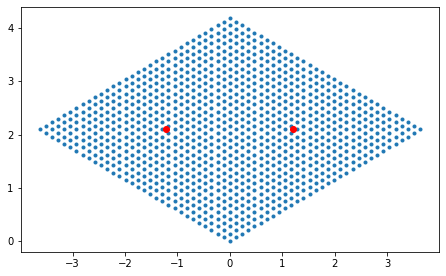

In [36]:
#test equidistant sampling
b1 = 2*np.pi*np.array([1/np.sqrt(3), 1/3.0])
b2 = 2*np.pi*np.array([-1/np.sqrt(3), 1/3.0])
npoints = 1000

points_along_bvec = np.linspace(0.0, 1.0, round(np.sqrt(npoints)))
b1i, b2i = np.meshgrid(points_along_bvec, points_along_bvec)
kxi = b1[0]*b1i+b2[0]*b2i
kyi = b1[1]*b1i+b2[1]*b2i
kx = kxi.flatten()
ky = kyi.flatten()
fig = plt.subplot(111)
plt.plot(kx, ky, '.')
plt.plot([2*np.pi/(3*np.sqrt(3)), -2*np.pi/(3*np.sqrt(3))], [2*np.pi/3, 2*np.pi/3], 'bo', color='red')
plt.show()

## Code of functions

In [3]:
def generate_spectrum_Twisted_graphene_single_point(vF, w, Theta, kx_fixed=0.0, ky_fixed=0.0, symmetric=False):
    '''spectrum data for 2D plots'''
    kx = kx_fixed
    ky = ky_fixed
    
    kTheta = 8 * np.pi * np.sin(Theta/2.0) / (3*np.sqrt(3))
    onex = 1.0
    
    hamiltonians_TBLG = np.zeros((8, 8), dtype=complex)
    
    if symmetric:
        #no phases with theta
        hamiltonians_TBLG[0, 1] = vF*(kx + 1j*ky)
        hamiltonians_TBLG[1, 0] = vF*(kx - 1j*ky)
        hamiltonians_TBLG[2, 3] = vF*(kx + 1j*(ky+onex*kTheta))
        hamiltonians_TBLG[3, 2] = vF*(kx - 1j*(ky+onex*kTheta))
        hamiltonians_TBLG[4, 5] = vF*(kx-0.5*np.sqrt(3)*onex*kTheta+1j*(ky-0.5*onex*kTheta))
        hamiltonians_TBLG[5, 4] = vF*(kx-0.5*np.sqrt(3)*onex*kTheta-1j*(ky-0.5*onex*kTheta))
        hamiltonians_TBLG[6, 7] = vF*(kx+0.5*np.sqrt(3)*onex*kTheta+1j*(ky-0.5*onex*kTheta))
        hamiltonians_TBLG[7, 6] = vF*(kx+0.5*np.sqrt(3)*onex*kTheta-1j*(ky-0.5*onex*kTheta))
    else:    
        hamiltonians_TBLG[0, 1] = vF*(kx + 1j*ky)*np.exp(-1j*Theta/2.0)
        hamiltonians_TBLG[1, 0] = vF*(kx - 1j*ky)*np.exp(1j*Theta/2.0)
        hamiltonians_TBLG[2, 3] = vF*(kx + 1j*(ky+onex*kTheta))*np.exp(-1j*Theta/2.0)
        hamiltonians_TBLG[3, 2] = vF*(kx - 1j*(ky+onex*kTheta))*np.exp(1j*Theta/2.0)
        hamiltonians_TBLG[4, 5] = vF*(kx-0.5*np.sqrt(3)*onex*kTheta+1j*(ky-0.5*onex*kTheta))*np.exp(-1j*Theta/2.0)
        hamiltonians_TBLG[5, 4] = vF*(kx-0.5*np.sqrt(3)*onex*kTheta-1j*(ky-0.5*onex*kTheta))*np.exp(1j*Theta/2.0)
        hamiltonians_TBLG[6, 7] = vF*(kx+0.5*np.sqrt(3)*onex*kTheta+1j*(ky-0.5*onex*kTheta))*np.exp(-1j*Theta/2.0)
        hamiltonians_TBLG[7, 6] = vF*(kx+0.5*np.sqrt(3)*onex*kTheta-1j*(ky-0.5*onex*kTheta))*np.exp(1j*Theta/2.0)
    
    hamiltonians_TBLG[0, 2] = w*onex
    hamiltonians_TBLG[0, 3] = w*onex
    hamiltonians_TBLG[1, 2] = w*onex
    hamiltonians_TBLG[1, 3] = w*onex
    
    hamiltonians_TBLG[0, 4] = w*onex
    hamiltonians_TBLG[0, 5] = w*(-0.5+1j*np.sqrt(3)/2.0)*onex
    hamiltonians_TBLG[1, 4] = w*(-0.5-1j*np.sqrt(3)/2.0)*onex
    hamiltonians_TBLG[1, 5] = w*onex
    
    hamiltonians_TBLG[0, 6] = w*onex
    hamiltonians_TBLG[0, 7] = w*(-0.5-1j*np.sqrt(3)/2.0)*onex
    hamiltonians_TBLG[1, 6] = w*(-0.5+1j*np.sqrt(3)/2.0)*onex
    hamiltonians_TBLG[1, 7] = w*onex
    
    #vertical blocks are the same
    hamiltonians_TBLG[2, 0] = w*onex
    hamiltonians_TBLG[3, 0] = w*onex
    hamiltonians_TBLG[2, 1] = w*onex
    hamiltonians_TBLG[3, 1] = w*onex
    
    hamiltonians_TBLG[4, 0] = w*onex
    hamiltonians_TBLG[4, 1] = w*(-0.5+1j*np.sqrt(3)/2.0)*onex
    hamiltonians_TBLG[5, 0] = w*(-0.5-1j*np.sqrt(3)/2.0)*onex
    hamiltonians_TBLG[5, 1] = w*onex
    
    hamiltonians_TBLG[6, 0] = w*onex
    hamiltonians_TBLG[6, 1] = w*(-0.5-1j*np.sqrt(3)/2.0)*onex
    hamiltonians_TBLG[7, 0] = w*(-0.5+1j*np.sqrt(3)/2.0)*onex
    hamiltonians_TBLG[7, 1] = w*onex
    
    
    spectrum_data = np.linalg.eigvalsh(hamiltonians_TBLG)
    
    return spectrum_data   


def generate_spectrum_Twisted_graphene_2D(vF, w, Theta, npoints, interval_size=0.1, ky_fixed=0.0, symmetric=False):
    '''spectrum data for 2D plots'''
    kx = np.linspace(-interval_size, interval_size, npoints)
    ky = ky_fixed*np.ones(npoints)
    
    kTheta = 8 * np.pi * np.sin(Theta/2.0) / (3*np.sqrt(3))
    onex = np.ones(npoints)
    
    hamiltonians_TBLG = np.zeros((npoints, 8, 8), dtype=complex)
    
    if symmetric:
        #no phases with theta
        hamiltonians_TBLG[:, 0, 1] = vF*(kx + 1j*ky)
        hamiltonians_TBLG[:, 1, 0] = vF*(kx - 1j*ky)
        hamiltonians_TBLG[:, 2, 3] = vF*(kx + 1j*(ky+onex*kTheta))
        hamiltonians_TBLG[:, 3, 2] = vF*(kx - 1j*(ky+onex*kTheta))
        hamiltonians_TBLG[:, 4, 5] = vF*(kx-0.5*np.sqrt(3)*onex*kTheta+1j*(ky-0.5*onex*kTheta))
        hamiltonians_TBLG[:, 5, 4] = vF*(kx-0.5*np.sqrt(3)*onex*kTheta-1j*(ky-0.5*onex*kTheta))
        hamiltonians_TBLG[:, 6, 7] = vF*(kx+0.5*np.sqrt(3)*onex*kTheta+1j*(ky-0.5*onex*kTheta))
        hamiltonians_TBLG[:, 7, 6] = vF*(kx+0.5*np.sqrt(3)*onex*kTheta-1j*(ky-0.5*onex*kTheta))
    else:    
        hamiltonians_TBLG[:, 0, 1] = vF*(kx + 1j*ky)*np.exp(-1j*Theta/2.0)
        hamiltonians_TBLG[:, 1, 0] = vF*(kx - 1j*ky)*np.exp(1j*Theta/2.0)
        hamiltonians_TBLG[:, 2, 3] = vF*(kx + 1j*(ky+onex*kTheta))*np.exp(-1j*Theta/2.0)
        hamiltonians_TBLG[:, 3, 2] = vF*(kx - 1j*(ky+onex*kTheta))*np.exp(1j*Theta/2.0)
        hamiltonians_TBLG[:, 4, 5] = vF*(kx-0.5*np.sqrt(3)*onex*kTheta+1j*(ky-0.5*onex*kTheta))*np.exp(-1j*Theta/2.0)
        hamiltonians_TBLG[:, 5, 4] = vF*(kx-0.5*np.sqrt(3)*onex*kTheta-1j*(ky-0.5*onex*kTheta))*np.exp(1j*Theta/2.0)
        hamiltonians_TBLG[:, 6, 7] = vF*(kx+0.5*np.sqrt(3)*onex*kTheta+1j*(ky-0.5*onex*kTheta))*np.exp(-1j*Theta/2.0)
        hamiltonians_TBLG[:, 7, 6] = vF*(kx+0.5*np.sqrt(3)*onex*kTheta-1j*(ky-0.5*onex*kTheta))*np.exp(1j*Theta/2.0)
    
    hamiltonians_TBLG[:, 0, 2] = w*onex
    hamiltonians_TBLG[:, 0, 3] = w*onex
    hamiltonians_TBLG[:, 1, 2] = w*onex
    hamiltonians_TBLG[:, 1, 3] = w*onex
    
    hamiltonians_TBLG[:, 0, 4] = w*onex
    hamiltonians_TBLG[:, 0, 5] = w*(-0.5+1j*np.sqrt(3)/2.0)*onex
    hamiltonians_TBLG[:, 1, 4] = w*(-0.5-1j*np.sqrt(3)/2.0)*onex
    hamiltonians_TBLG[:, 1, 5] = w*onex
    
    hamiltonians_TBLG[:, 0, 6] = w*onex
    hamiltonians_TBLG[:, 0, 7] = w*(-0.5-1j*np.sqrt(3)/2.0)*onex
    hamiltonians_TBLG[:, 1, 6] = w*(-0.5+1j*np.sqrt(3)/2.0)*onex
    hamiltonians_TBLG[:, 1, 7] = w*onex
    
    #vertical blocks are the same
    hamiltonians_TBLG[:, 2, 0] = w*onex
    hamiltonians_TBLG[:, 3, 0] = w*onex
    hamiltonians_TBLG[:, 2, 1] = w*onex
    hamiltonians_TBLG[:, 3, 1] = w*onex
    
    hamiltonians_TBLG[:, 4, 0] = w*onex
    hamiltonians_TBLG[:, 4, 1] = w*(-0.5+1j*np.sqrt(3)/2.0)*onex
    hamiltonians_TBLG[:, 5, 0] = w*(-0.5-1j*np.sqrt(3)/2.0)*onex
    hamiltonians_TBLG[:, 5, 1] = w*onex
    
    hamiltonians_TBLG[:, 6, 0] = w*onex
    hamiltonians_TBLG[:, 6, 1] = w*(-0.5-1j*np.sqrt(3)/2.0)*onex
    hamiltonians_TBLG[:, 7, 0] = w*(-0.5+1j*np.sqrt(3)/2.0)*onex
    hamiltonians_TBLG[:, 7, 1] = w*onex
    
    
    spectrum_data = np.linalg.eigvalsh(hamiltonians_TBLG)
    
    return kx, spectrum_data   
    

def generate_spectrum_Twisted_graphene(vF, w, Theta, npoints, interval_size=0.1, symmetric=False):
    '''npoints - points alogn one hexagon basis vector'''
    Np = npoints
    b1 = np.array([interval_size*np.sqrt(3)/2.0, -interval_size/2.0])
    b2 = np.array([interval_size*np.sqrt(3)/2.0, interval_size/2.0])
    b3 = np.array([0.0, interval_size])
    b4 = - b1
    b5 = - b2
    b6 = - b3

    rhombus_kx_1 = np.array([b1[0]*b1i/Np+b3[0]*b2i/Np for b1i in range(Np+1) for b2i in range(Np+1)])
    rhombus_ky_1 = np.array([b1[1]*b1i/Np+b3[1]*b2i/Np for b1i in range(Np+1) for b2i in range(Np+1)])

    rhombus_kx_2 = np.array([b3[0]*b1i/Np+b5[0]*b2i/Np for b1i in range(Np+1) for b2i in range(1,Np+1)])
    rhombus_ky_2 = np.array([b3[1]*b1i/Np+b5[1]*b2i/Np for b1i in range(Np+1) for b2i in range(1,Np+1)])

    rhombus_kx_3 = np.array([b5[0]*b1i/Np+b1[0]*b2i/Np for b1i in range(1,Np+1) for b2i in range(1,Np+1)])
    rhombus_ky_3 = np.array([b5[1]*b1i/Np+b1[1]*b2i/Np for b1i in range(1,Np+1) for b2i in range(1,Np+1)])

    #kx, ky inside hexagons
    kx = np.concatenate((rhombus_kx_1, rhombus_kx_2, rhombus_kx_3))
    ky = np.concatenate((rhombus_ky_1, rhombus_ky_2, rhombus_ky_3))

    count = len(kx)
    
    kTheta = 8 * np.pi * np.sin(Theta/2.0) / (3*np.sqrt(3))
    onex = np.ones(count)
    

    hamiltonians_TBLG = np.zeros((count, 8, 8), dtype=complex)
    
    if symmetric:
        hamiltonians_TBLG[:, 0, 1] = vF*(kx + 1j*ky)*np.exp(-1j*Theta/2.0)
        hamiltonians_TBLG[:, 1, 0] = vF*(kx - 1j*ky)*np.exp(1j*Theta/2.0)
        hamiltonians_TBLG[:, 2, 3] = vF*(kx + 1j*(ky+onex*kTheta))*np.exp(-1j*Theta/2.0)
        hamiltonians_TBLG[:, 3, 2] = vF*(kx - 1j*(ky+onex*kTheta))*np.exp(1j*Theta/2.0)
        hamiltonians_TBLG[:, 4, 5] = vF*(kx-0.5*np.sqrt(3)*onex*kTheta+1j*(ky-0.5*onex*kTheta))*np.exp(-1j*Theta/2.0)
        hamiltonians_TBLG[:, 5, 4] = vF*(kx-0.5*np.sqrt(3)*onex*kTheta-1j*(ky-0.5*onex*kTheta))*np.exp(1j*Theta/2.0)
        hamiltonians_TBLG[:, 6, 7] = vF*(kx+0.5*np.sqrt(3)*onex*kTheta+1j*(ky-0.5*onex*kTheta))*np.exp(-1j*Theta/2.0)
        hamiltonians_TBLG[:, 7, 6] = vF*(kx+0.5*np.sqrt(3)*onex*kTheta-1j*(ky-0.5*onex*kTheta))*np.exp(1j*Theta/2.0)    
    else:
        hamiltonians_TBLG[:, 0, 1] = vF*(kx + 1j*ky)*np.exp(-1j*Theta/2.0)
        hamiltonians_TBLG[:, 1, 0] = vF*(kx - 1j*ky)*np.exp(1j*Theta/2.0)
        hamiltonians_TBLG[:, 2, 3] = vF*(kx + 1j*(ky+onex*kTheta))*np.exp(-1j*Theta/2.0)
        hamiltonians_TBLG[:, 3, 2] = vF*(kx - 1j*(ky+onex*kTheta))*np.exp(1j*Theta/2.0)
        hamiltonians_TBLG[:, 4, 5] = vF*(kx-0.5*np.sqrt(3)*onex*kTheta+1j*(ky-0.5*onex*kTheta))*np.exp(-1j*Theta/2.0)
        hamiltonians_TBLG[:, 5, 4] = vF*(kx-0.5*np.sqrt(3)*onex*kTheta-1j*(ky-0.5*onex*kTheta))*np.exp(1j*Theta/2.0)
        hamiltonians_TBLG[:, 6, 7] = vF*(kx+0.5*np.sqrt(3)*onex*kTheta+1j*(ky-0.5*onex*kTheta))*np.exp(-1j*Theta/2.0)
        hamiltonians_TBLG[:, 7, 6] = vF*(kx+0.5*np.sqrt(3)*onex*kTheta-1j*(ky-0.5*onex*kTheta))*np.exp(1j*Theta/2.0)
   
    
    hamiltonians_TBLG[:, 0, 2] = w*onex
    hamiltonians_TBLG[:, 0, 3] = w*onex
    hamiltonians_TBLG[:, 1, 2] = w*onex
    hamiltonians_TBLG[:, 1, 3] = w*onex
    
    hamiltonians_TBLG[:, 0, 4] = w*onex
    hamiltonians_TBLG[:, 0, 5] = w*(-0.5+1j*np.sqrt(3)/2.0)*onex
    hamiltonians_TBLG[:, 1, 4] = w*(-0.5-1j*np.sqrt(3)/2.0)*onex
    hamiltonians_TBLG[:, 1, 5] = w*onex
    
    hamiltonians_TBLG[:, 0, 6] = w*onex
    hamiltonians_TBLG[:, 0, 7] = w*(-0.5-1j*np.sqrt(3)/2.0)*onex
    hamiltonians_TBLG[:, 1, 6] = w*(-0.5+1j*np.sqrt(3)/2.0)*onex
    hamiltonians_TBLG[:, 1, 7] = w*onex
    
    #vertical blocks are the same
    hamiltonians_TBLG[:, 2, 0] = w*onex
    hamiltonians_TBLG[:, 3, 0] = w*onex
    hamiltonians_TBLG[:, 2, 1] = w*onex
    hamiltonians_TBLG[:, 3, 1] = w*onex
    
    hamiltonians_TBLG[:, 4, 0] = w*onex
    hamiltonians_TBLG[:, 4, 1] = w*(-0.5+1j*np.sqrt(3)/2.0)*onex
    hamiltonians_TBLG[:, 5, 0] = w*(-0.5-1j*np.sqrt(3)/2.0)*onex
    hamiltonians_TBLG[:, 5, 1] = w*onex
    
    hamiltonians_TBLG[:, 6, 0] = w*onex
    hamiltonians_TBLG[:, 6, 1] = w*(-0.5-1j*np.sqrt(3)/2.0)*onex
    hamiltonians_TBLG[:, 7, 0] = w*(-0.5+1j*np.sqrt(3)/2.0)*onex
    hamiltonians_TBLG[:, 7, 1] = w*onex
    
    
    spectrum_data = np.linalg.eigvalsh(hamiltonians_TBLG)
    
    return kx, ky, spectrum_data


def generate_dos_Twisted_graphene_vectorized(energy_set, vF, w, Theta, npoints, gamma, 
                                            interval_size = 0.1):
    """calculates dos for tgraphene using lorentz-like fdelta function
    
    calctypes = monte carlo, equidistant
    
    energy_set - vector of energies
    """
    
    kxdata, kydata, spects = generate_spectrum_Twisted_graphene(vF=vF, w=w, Theta=Theta, npoints=npoints, 
                                                                interval_size=interval_size)
    
    dos_data = np.zeros(len(energy_set))
    onex = np.ones(len(kxdata))
    count = len(kxdata)
    print(count)
    
    for i in range(len(energy_set)):
        funcdata = 0.0
        for j in range(8):
            funcdata += np.sum((gamma/np.pi)*onex*np.power(gamma*gamma*onex+np.power(energy_set[i]*onex-spects[:,j], 2), -1))
        dos_data[i] = funcdata/count
        
    return dos_data


def generate_2D_Econst_contour(kxset, kyset, energy_data, energy_const_set, level_broadening=0.01, band_number=8):
    '''generates constant energy contours for energies from given energy_const_set
    
    uses grid as 
    '''
    
    kx_data = []
    ky_data = []
    for j in range(len(energy_const_set)):
        kx_data_ej = []
        ky_data_ej = []
        energy = energy_const_set[j]
        for i in range(band_number):
            indexes = np.where(np.logical_and(energy_data[:,i]>=energy-level_broadening, energy_data[:,i]<=energy+level_broadening))
            kx_data_ej.append(kxset[indexes])
            ky_data_ej.append(kyset[indexes])
        
        kx_data.append([energy, [item for sublist in kx_data_ej for item in sublist]])
        ky_data.append([energy, [item for sublist in ky_data_ej for item in sublist]])
        
    return kx_data, ky_data

In [3]:
#1 degree
0.0174533

0.0174533

In [8]:
print(0.0*np.ones(10))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [57]:
print(generate_dos_Twisted_graphene_vectorized([0.05, 0.01, 0.04, 0.03, 0.02, 0.05, 0.01, 0.04, 0.03, 0.02, 0.05, 0.01, 0.04, 0.03, 0.02, 0.05, 0.01, 0.04, 0.03, 0.02], 
                                               vF=4.31074647887324, w=0.11, Theta=0.018326, npoints=250, gamma=0.005))

188251
[ 5.27676185 11.34585003  5.46965654  5.94188106  7.17895131  5.27676185
 11.34585003  5.46965654  5.94188106  7.17895131  5.27676185 11.34585003
  5.46965654  5.94188106  7.17895131  5.27676185 11.34585003  5.46965654
  5.94188106  7.17895131]


# Exact BMD model: DoS plots for different angles + 3D plot 

## 2D plots of DoS to check the results

In [30]:
mu_set = np.linspace(-0.4, 0.4, 200)
theta_magic = 0.018326
dos_data_magic = generate_dos_Twisted_graphene_vectorized(mu_set, vF=4.31074647887324, w=0.11, Theta=0.018326, npoints=90000, gamma=0.0025, 
                                    calctype='equidistant')

In [31]:
dos_data_2magic = generate_dos_Twisted_graphene_vectorized(mu_set, vF=4.31074647887324, w=0.11, Theta=2*0.018326, npoints=90000, gamma=0.0025, 
                                    calctype='equidistant')

In [32]:
dos_data_05magic = generate_dos_Twisted_graphene_vectorized(mu_set, vF=4.31074647887324, w=0.11, Theta=0.5*0.018326, npoints=90000, gamma=0.0025, 
                                    calctype='equidistant')

In [21]:
print(dos_data_magic)
print(dos_data_2magic)
print(dos_data_05magic)

[ 4.79969393  4.83520365  4.8750838   4.92040603  4.97297753  5.03594187
  5.11428986  5.21169488  5.321286    5.42595717  5.51158006  5.58117148
  5.64333234  5.70412512  5.76750819  5.83657439  5.91435304  6.00439972
  6.11140085  6.24192742  6.40519016  6.61198315  6.86126195  7.08096528
  7.09578028  6.91538627  6.71352738  6.55393468  6.42910883  6.31812427
  6.21328712  6.11520424  6.02458687  5.94125236  5.86352853  5.7862917
  5.70374567  5.61621974  5.52627215  5.43553784  5.34482466  5.25451523
  5.16478806  5.07572309  4.98735297  4.89968911  4.8127356   4.72649757
  4.64098728  4.55623013  4.4722731   4.38920031  4.30716386  4.22644143
  4.14745954  4.07004012  3.99040698  3.9071597   3.83079855  3.76689156
  3.71397695  3.6694157   3.63113729  3.59771357  3.56817917  3.54187882
  3.51836603  3.49733898  3.47860008  3.4620305   3.44757384  3.4352262
  3.42503057  3.41707465  3.41149159  3.40846325  3.40822612  3.41107992
  3.41739979  3.42765268  3.44242007  3.4624289   3.4

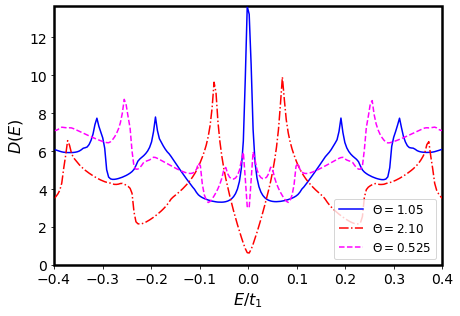

In [35]:
plt.rcParams['figure.figsize'] = 6.5, 4.5
plt.rcParams["legend.handlelength"] = 1.0
fig=plt.subplot(111)

plt.plot(mu_set, dos_data_magic , '-', color='blue', label=r'$\Theta=1.05$')
plt.plot(mu_set, dos_data_2magic , '-.', color='red', label=r'$\Theta=2.10$')
plt.plot(mu_set, dos_data_05magic, '--', color='magenta', label=r'$\Theta=0.525$')

standartize_figure(fig,
    axes_labels=[r"$E/t_{1}$", r"$D(E)$"],
    rotate_ylabel=False,
    axes_limits=[min(mu_set), max(mu_set), 0.0, max(dos_data_magic)],
    legend=True,
    legend_label=None,
    legend_position='lower right',
    legend_box=False,
    ticks_fontsize=14,
    axes_label_fontsize=16,
    ylabelpad=24,
    legend_fontsize=12)
plt.savefig('dos_tblg_three_angles_G0d0025.pdf', dpi=None, facecolor='w', edgecolor='w',
      orientation='portrait', format='pdf',
      transparent=False, bbox_inches=None, pad_inches=0.1,
      metadata=None)
plt.show()

## 3D plot of DOS evolution

In [3]:
mu_set_2 = np.linspace(-0.1, 0.1, 401)
angle_set = np.linspace(0.5*0.018326, 1.5*0.018326, 21)
dos_data_for_angle = np.zeros((len(angle_set), len(mu_set_2)))
for i in range(len(angle_set)):
    dos_data_for_angle[i,:] = generate_dos_Twisted_graphene_vectorized(mu_set_2, vF=4.31074647887324, w=0.11, Theta=angle_set[i], npoints=160000, gamma=0.0025, 
                                    calctype='equidistant')
    #print('dos_'+str(i)+'=', list(dos_data_for_angle[i,:]))    

In [42]:
print(angle_set/0.018326)

[0.5   0.525 0.55  0.575 0.6   0.625 0.65  0.675 0.7   0.725 0.75  0.775
 0.8   0.825 0.85  0.875 0.9   0.925 0.95  0.975 1.    1.025 1.05  1.075
 1.1   1.125 1.15  1.175 1.2   1.225 1.25  1.275 1.3   1.325 1.35  1.375
 1.4   1.425 1.45  1.475 1.5  ]


<IPython.core.display.Javascript object>


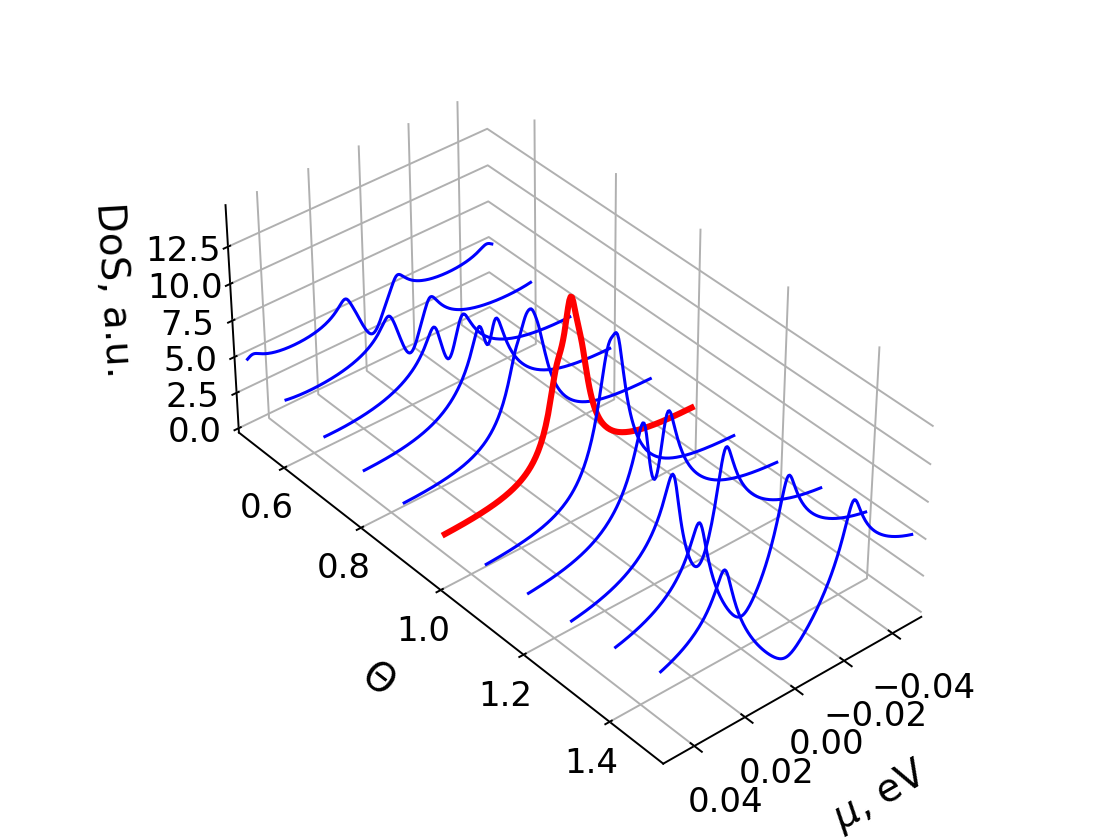

In [6]:
%matplotlib notebook
figur = plt.figure()
ax = figur.gca(projection='3d')

idx = (mu_set_2 >= -0.05) & (mu_set_2 <= 0.05)

for i in range(len(angle_set)):
    if (i%2==0) and (i==10):
        ax.plot(mu_set_2[idx], [(1/0.018326)*angle_set[i] for mu_set_2_j in mu_set_2[idx]], 
                dos_data_for_angle[i,idx], '-', color='red', linewidth=2.5)
    elif (i%2==0):
        ax.plot(mu_set_2[idx], [(1/0.018326)*angle_set[i] for mu_set_2_j in mu_set_2[idx]], 
                dos_data_for_angle[i,idx], '-', color='blue', linewidth=1.25)

ax.set_xlim([-0.05, 0.05])
ax.set_ylim([0.5, 1.5])
ax.set_zlim([0.0, max(dos_data_for_angle[10,:])])
        
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))

# plt.title(r'$k=$'+str(round(kx, 3))+','+' '+r'$\omega_0=$' + str(round(sqrt(kx*beta),3)))
# plt.title(r'$\omega_0=$' + str(round(sqrt(kx * beta), 3)))
for tickx in ax.xaxis.get_major_ticks():
    tickx.label.set_fontsize(14)

for tickx in ax.yaxis.get_major_ticks():
    tickx.label.set_fontsize(14)

for tickx in ax.zaxis.get_major_ticks():
    tickx.label.set_fontsize(14)


plt.locator_params(nbins=7)

ax.set_xlabel(r'$\mu$, eV', fontsize=16, labelpad=10)
ax.set_ylabel(r'$\Theta$', fontsize=16, labelpad=20)
ax.set_zlabel('DoS, a.u.', fontsize=16, labelpad=10)

ax.set_box_aspect(aspect = (1,2,0.85))

plt.tight_layout()

ax.azim = 50
ax.elev = 37

plt.savefig('dos_tblg_angle_dep_G0d0025_evolution.pdf', dpi=None, facecolor='w', edgecolor='w',
      orientation='portrait', format='pdf',
      transparent=False, bbox_inches=None, pad_inches=0.1,
      metadata=None)

plt.show()

In [7]:
mu_set_v2 = np.linspace(-0.055, 0.055, 401)
angle_set = np.linspace(0.5*0.018326, 1.5*0.018326, 21)
dos_data_for_angle_v2 = np.zeros((len(angle_set), len(mu_set_v2)))
for i in range(len(angle_set)):
    dos_data_for_angle_v2[i,:] = generate_dos_Twisted_graphene_vectorized(mu_set_v2, vF=4.31074647887324, w=0.11, Theta=angle_set[i], 
                                                                          npoints=160000, gamma=0.0005, 
                                    calctype='equidistant')

<IPython.core.display.Javascript object>


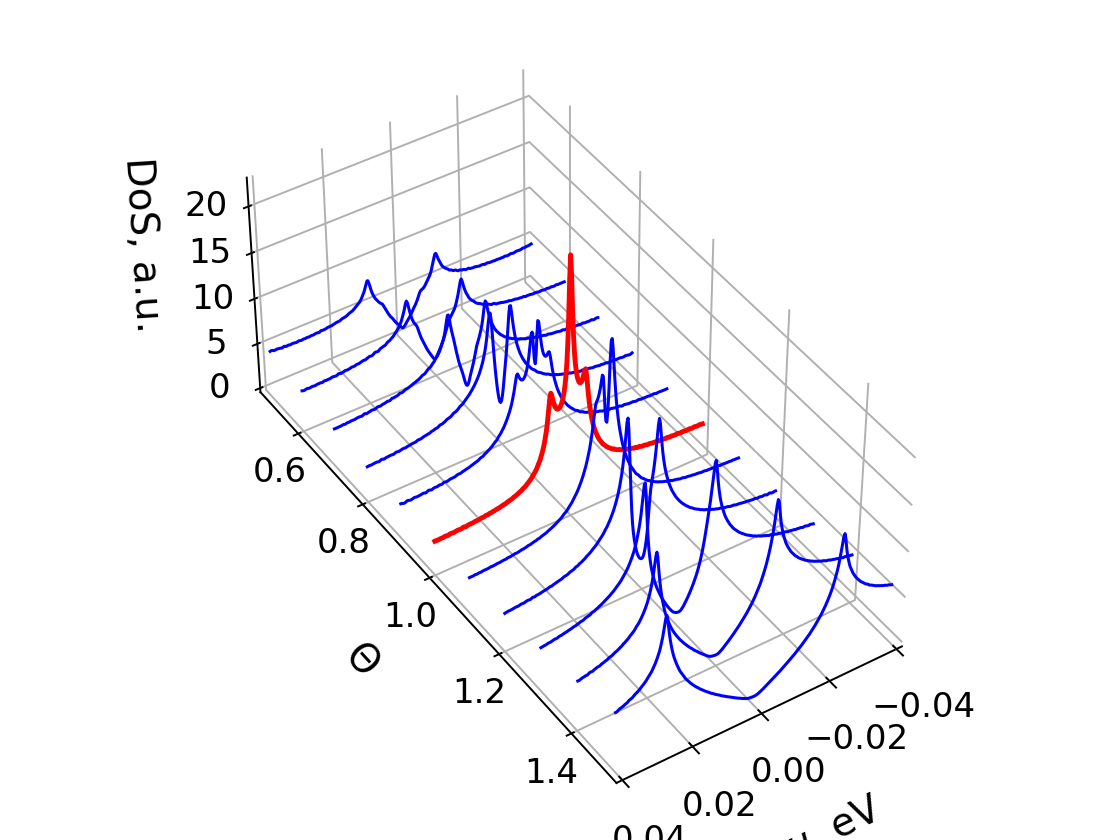

In [8]:
figur = plt.figure()
ax = figur.gca(projection='3d')

idx = (mu_set_v2 >= -0.04) & (mu_set_v2 <= 0.04)

for i in range(len(angle_set)):
    if (i%2==0) and (i==10):
        ax.plot(mu_set_v2[idx], [(1/0.018326)*angle_set[i] for mu_set_2_j in mu_set_v2[idx]], 
                dos_data_for_angle_v2[i,idx], '-', color='red', linewidth=2.0)
    elif (i%2==0):
        ax.plot(mu_set_v2[idx], [(1/0.018326)*angle_set[i] for mu_set_2_j in mu_set_v2[idx]], 
                dos_data_for_angle_v2[i,idx], '-', color='blue', linewidth=1.25)

ax.set_xlim([-0.04, 0.04])
ax.set_ylim([0.5, 1.5])
ax.set_zlim([0.0, max(dos_data_for_angle_v2[10,:]-5.0)])
        
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))

# plt.title(r'$k=$'+str(round(kx, 3))+','+' '+r'$\omega_0=$' + str(round(sqrt(kx*beta),3)))
# plt.title(r'$\omega_0=$' + str(round(sqrt(kx * beta), 3)))
for tickx in ax.xaxis.get_major_ticks():
    tickx.label.set_fontsize(14)

for tickx in ax.yaxis.get_major_ticks():
    tickx.label.set_fontsize(14)

for tickx in ax.zaxis.get_major_ticks():
    tickx.label.set_fontsize(14)


plt.locator_params(nbins=7)

ax.set_xlabel(r'$\mu$, eV', fontsize=16, labelpad=10)
ax.set_ylabel(r'$\Theta$', fontsize=16, labelpad=20)
ax.set_zlabel('DoS, a.u.', fontsize=16, labelpad=10)

ax.set_box_aspect(aspect = (1,2,0.85))

plt.tight_layout()

ax.azim = 50
ax.elev = 37

plt.savefig('dos_tblg_angle_dep_G0d0005_evolution.pdf', dpi=None, facecolor='w', edgecolor='w',
      orientation='portrait', format='pdf',
      transparent=False, bbox_inches=None, pad_inches=0.1,
      metadata=None)

plt.show()

In [60]:
mu_set_v2 = np.linspace(-0.055, 0.055, 401)
angle_set = np.linspace(0.5*0.018326, 1.5*0.018326, 21)
dos_data_for_angle_v2 = np.zeros((len(angle_set), len(mu_set_v2)))
for i in range(len(angle_set)):
    dos_data_for_angle_v2[i,:] = generate_dos_Twisted_graphene_vectorized(mu_set_v2, vF=4.31074647887324, w=0.11, Theta=angle_set[i], 
                                                                          npoints=270, gamma=0.0005)

219511
219511
219511
219511
219511
219511
219511
219511
219511
219511
219511
219511
219511
219511
219511
219511
219511
219511
219511
219511
219511


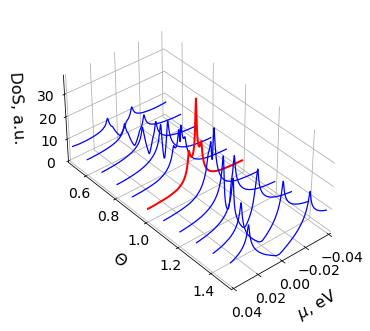

In [62]:
figur = plt.figure()
ax = figur.gca(projection='3d')

idx = (mu_set_v2 >= -0.04) & (mu_set_v2 <= 0.04)

for i in range(len(angle_set)):
    if (i%2==0) and (i==10):
        ax.plot(mu_set_v2[idx], [(1/0.018326)*angle_set[i] for mu_set_2_j in mu_set_v2[idx]], 
                dos_data_for_angle_v2[i,idx], '-', color='red', linewidth=2.0)
    elif (i%2==0):
        ax.plot(mu_set_v2[idx], [(1/0.018326)*angle_set[i] for mu_set_2_j in mu_set_v2[idx]], 
                dos_data_for_angle_v2[i,idx], '-', color='blue', linewidth=1.25)

ax.set_xlim([-0.04, 0.04])
ax.set_ylim([0.5, 1.5])
ax.set_zlim([0.0, max(dos_data_for_angle_v2[10,:]-5.0)])
        
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))

# plt.title(r'$k=$'+str(round(kx, 3))+','+' '+r'$\omega_0=$' + str(round(sqrt(kx*beta),3)))
# plt.title(r'$\omega_0=$' + str(round(sqrt(kx * beta), 3)))
for tickx in ax.xaxis.get_major_ticks():
    tickx.label.set_fontsize(14)

for tickx in ax.yaxis.get_major_ticks():
    tickx.label.set_fontsize(14)

for tickx in ax.zaxis.get_major_ticks():
    tickx.label.set_fontsize(14)


plt.locator_params(nbins=7)

ax.set_xlabel(r'$\mu$, eV', fontsize=16, labelpad=10)
ax.set_ylabel(r'$\Theta$', fontsize=16, labelpad=20)
ax.set_zlabel('DoS, a.u.', fontsize=16, labelpad=10)

ax.set_box_aspect(aspect = (1,2,0.85))

plt.tight_layout()

ax.azim = 50
ax.elev = 37

plt.savefig('dos_tblg_angle_dep_G0d0005_evolution.pdf', dpi=None, facecolor='w', edgecolor='w',
      orientation='portrait', format='pdf',
      transparent=False, bbox_inches=None, pad_inches=0.1,
      metadata=None)

plt.show()

## Comparison of DoS and 2D spectrum

In [69]:
#magic angle 1.05 regime
vFpar = 4.31074647887324
wpar=0.11
Thetapar = 0.018326
kx_space, spec = generate_spectrum_Twisted_graphene_2D(vF=vFpar, w=wpar, Theta=Thetapar, npoints=201, interval_size=0.15, ky_fixed=0.0)

#dos
mu_set_for_DOS = np.linspace(-0.3, 0.3, 801)
dos_data_magic = generate_dos_Twisted_graphene_vectorized(energy_set=mu_set_for_DOS, vF=vFpar, w=wpar, 
                                                          gamma=0.00025, Theta=Thetapar, npoints=700, 
                                                          interval_size = 0.15)

1472101


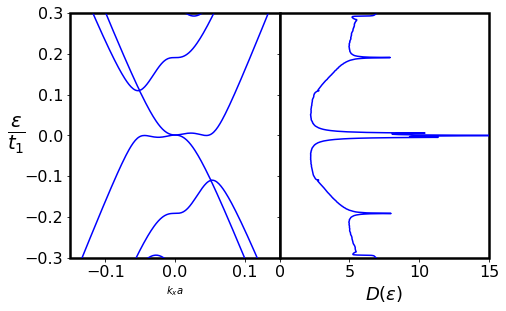

In [70]:
plt.rcParams['figure.figsize'] = 7.5, 4.5
plt.rcParams["legend.handlelength"] = 1.0
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=True)

for i in range(8):
    axes[0].plot(kx_space, spec[:,i], '-', color='blue')
    

axes[0].set_xlim(min(kx_space), max(kx_space))
axes[0].set_ylim(min(mu_set_for_DOS), max(mu_set_for_DOS))
axes[0].set_xlabel(r'$k_x a$')
axes[0].set_ylabel(r"$\frac{\epsilon}{t_{1}}$", rotation='horizontal', fontsize=28, va='center', labelpad=8)


axes[1].plot(dos_data_magic, mu_set_for_DOS, '-', color='blue')
axes[1].set_xlabel(r"$D(\epsilon)$", fontsize=18)
axes[1].set_xlim(0.0, 15.0)
#axes[1].set_xticks([0.5, 1, 1.5, 2, 2.5, 3.0])

make_border(axes[0], limits=[min(kx_space), max(kx_space), min(mu_set_for_DOS), max(mu_set_for_DOS)])
make_border(axes[1], limits=[0.0, 15.0, min(mu_set_for_DOS), max(mu_set_for_DOS)])

axes[0].tick_params(axis='both', which='major', labelsize=16)
axes[1].tick_params(axis='both', which='major', labelsize=16)


fig.subplots_adjust(wspace=0)
#axes[0].text(0.2, 1.4, r'(a) $\alpha=1/3$', fontsize=17)
#plt.text(1.5, 1.5, 'Para', fontsize=14)
#plt.text(1.5, -1.5, 'Dia', fontsize=14)
plt.show()

In [24]:
#magic angle 1.05 regime
vFpar = 4.31074647887324
wpar=0.11
Thetapar = 0.018326
kx_space, spec = generate_spectrum_Twisted_graphene_2D(vF=vFpar, w=wpar, Theta=Thetapar, npoints=201, interval_size=0.15, ky_fixed=0.0)

#dos
mu_set_for_DOS = np.linspace(-0.1, 0.1, 1001)
dos_data_magic = generate_dos_Twisted_graphene_vectorized(energy_set=mu_set_for_DOS, vF=vFpar, w=wpar, 
                                                          gamma=0.0005, Theta=Thetapar, npoints=450, 
                                                          interval_size = 0.15)

608851


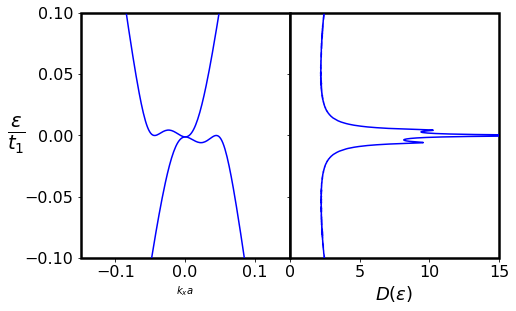

In [25]:
plt.rcParams['figure.figsize'] = 7.5, 4.5
plt.rcParams["legend.handlelength"] = 1.0
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=True)

for i in range(8):
    axes[0].plot(kx_space, spec[:,i], '-', color='blue')
    

axes[0].set_xlim(min(kx_space), max(kx_space))
axes[0].set_ylim(min(mu_set_for_DOS), max(mu_set_for_DOS))
axes[0].set_xlabel(r'$k_x a$')
axes[0].set_ylabel(r"$\frac{\epsilon}{t_{1}}$", rotation='horizontal', fontsize=28, va='center', labelpad=8)


axes[1].plot(dos_data_magic, mu_set_for_DOS, '-', color='blue')
axes[1].set_xlabel(r"$D(\epsilon)$", fontsize=18)
axes[1].set_xlim(0.0, 15.0)
#axes[1].set_xticks([0.5, 1, 1.5, 2, 2.5, 3.0])

make_border(axes[0], limits=[min(kx_space), max(kx_space), min(mu_set_for_DOS), max(mu_set_for_DOS)])
make_border(axes[1], limits=[0.0, 15.0, min(mu_set_for_DOS), max(mu_set_for_DOS)])

axes[0].tick_params(axis='both', which='major', labelsize=16)
axes[1].tick_params(axis='both', which='major', labelsize=16)


fig.subplots_adjust(wspace=0)
#axes[0].text(0.2, 1.4, r'(a) $\alpha=1/3$', fontsize=17)
#plt.text(1.5, 1.5, 'Para', fontsize=14)
#plt.text(1.5, -1.5, 'Dia', fontsize=14)
plt.show()

In [26]:
#magic angle 1.05 regime
vFpar = 4.31074647887324
wpar=0.11
Thetapar = 0.018326
kx_space, spec = generate_spectrum_Twisted_graphene_2D(vF=vFpar, w=wpar, Theta=Thetapar, npoints=201, interval_size=0.15, ky_fixed=0.0)

#dos
mu_set_for_DOS = np.linspace(-0.15, 0.15, 2001)
dos_data_magic = generate_dos_Twisted_graphene_vectorized(energy_set=mu_set_for_DOS, vF=vFpar, w=wpar, 
                                                          gamma=0.0005, Theta=Thetapar, npoints=350, 
                                                          interval_size = 0.15)

368551


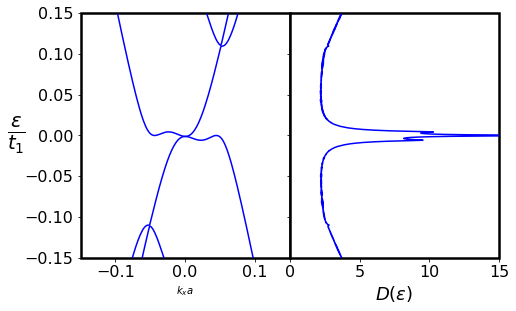

In [27]:
plt.rcParams['figure.figsize'] = 7.5, 4.5
plt.rcParams["legend.handlelength"] = 1.0
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=True)

for i in range(8):
    axes[0].plot(kx_space, spec[:,i], '-', color='blue')
    

axes[0].set_xlim(min(kx_space), max(kx_space))
axes[0].set_ylim(min(mu_set_for_DOS), max(mu_set_for_DOS))
axes[0].set_xlabel(r'$k_x a$')
axes[0].set_ylabel(r"$\frac{\epsilon}{t_{1}}$", rotation='horizontal', fontsize=28, va='center', labelpad=8)


axes[1].plot(dos_data_magic, mu_set_for_DOS, '-', color='blue')
axes[1].set_xlabel(r"$D(\epsilon)$", fontsize=18)
axes[1].set_xlim(0.0, 15.0)
#axes[1].set_xticks([0.5, 1, 1.5, 2, 2.5, 3.0])

make_border(axes[0], limits=[min(kx_space), max(kx_space), min(mu_set_for_DOS), max(mu_set_for_DOS)])
make_border(axes[1], limits=[0.0, 15.0, min(mu_set_for_DOS), max(mu_set_for_DOS)])

axes[0].tick_params(axis='both', which='major', labelsize=16)
axes[1].tick_params(axis='both', which='major', labelsize=16)


fig.subplots_adjust(wspace=0)
#axes[0].text(0.2, 1.4, r'(a) $\alpha=1/3$', fontsize=17)
#plt.text(1.5, 1.5, 'Para', fontsize=14)
#plt.text(1.5, -1.5, 'Dia', fontsize=14)
plt.show()

In [ ]:
#0.95 of magic angle 1.05 regime
vFpar = 4.31074647887324
wpar=0.11
Thetapar = 0.95*0.018326
kx_space, spec = generate_spectrum_Twisted_graphene_2D(vF=vFpar, w=wpar, Theta=Thetapar, npoints=201, interval_size=0.15, ky_fixed=0.0)

#dos
mu_set_for_DOS = np.linspace(-0.15, 0.15, 2001)
dos_data_magic = generate_dos_Twisted_graphene_vectorized(energy_set=mu_set_for_DOS, vF=vFpar, w=wpar, 
                                                          gamma=0.0005, Theta=Thetapar, npoints=350, 
                                                          interval_size = 0.15)

In [ ]:
plt.rcParams['figure.figsize'] = 7.5, 4.5
plt.rcParams["legend.handlelength"] = 1.0
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=True)

for i in range(8):
    axes[0].plot(kx_space, spec[:,i], '-', color='blue')
    

axes[0].set_xlim(min(kx_space), max(kx_space))
axes[0].set_ylim(min(mu_set_for_DOS), max(mu_set_for_DOS))
axes[0].set_xlabel(r'$k_x a$')
axes[0].set_ylabel(r"$\frac{\epsilon}{t_{1}}$", rotation='horizontal', fontsize=28, va='center', labelpad=8)


axes[1].plot(dos_data_magic, mu_set_for_DOS, '-', color='blue')
axes[1].set_xlabel(r"$D(\epsilon)$", fontsize=18)
axes[1].set_xlim(0.0, 15.0)
#axes[1].set_xticks([0.5, 1, 1.5, 2, 2.5, 3.0])

make_border(axes[0], limits=[min(kx_space), max(kx_space), min(mu_set_for_DOS), max(mu_set_for_DOS)])
make_border(axes[1], limits=[0.0, 15.0, min(mu_set_for_DOS), max(mu_set_for_DOS)])

axes[0].tick_params(axis='both', which='major', labelsize=16)
axes[1].tick_params(axis='both', which='major', labelsize=16)


fig.subplots_adjust(wspace=0)
#axes[0].text(0.2, 1.4, r'(a) $\alpha=1/3$', fontsize=17)
#plt.text(1.5, 1.5, 'Para', fontsize=14)
#plt.text(1.5, -1.5, 'Dia', fontsize=14)
plt.show()

In [ ]:
#1.05 of magic angle 1.05 regime
vFpar = 4.31074647887324
wpar=0.11
Thetapar = 1.05*0.018326
kx_space, spec = generate_spectrum_Twisted_graphene_2D(vF=vFpar, w=wpar, Theta=Thetapar, npoints=201, interval_size=0.15, ky_fixed=0.0)

#dos
mu_set_for_DOS = np.linspace(-0.15, 0.15, 2001)
dos_data_magic = generate_dos_Twisted_graphene_vectorized(energy_set=mu_set_for_DOS, vF=vFpar, w=wpar, 
                                                          gamma=0.0005, Theta=Thetapar, npoints=350, 
                                                          interval_size = 0.15)

## Equi energy contours for spectrum structure

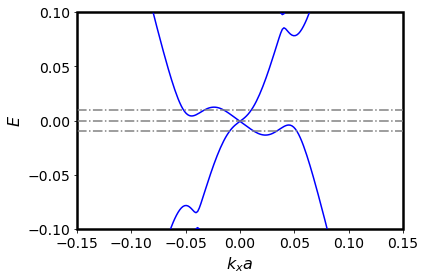

In [3]:
vFpar = 4.31074647887324
wpar=0.11
Thetapar = 0.75*0.018326
econst = 0.01
kx_space, spec = generate_spectrum_Twisted_graphene_2D(vF=vFpar, w=wpar, Theta=Thetapar, npoints=201, interval_size=0.15, ky_fixed=0.0)
fig=plt.subplot(111, aspect=1.0)

for i in range(8):
    plt.plot(kx_space, spec[:,i], '-', color='blue')
plt.plot([min(kx_space), max(kx_space)], [econst, econst], '-.', color='gray')
plt.plot([min(kx_space), max(kx_space)], [0.0, 0.0], '-.', color='gray')
plt.plot([min(kx_space), max(kx_space)], [-econst, -econst], '-.', color='gray')

standartize_figure(fig,
    axes_labels=[r"$k_{x}a$", r"$E$"],
    rotate_ylabel=False,
    axes_limits=[min(kx_space), max(kx_space), -0.1, 0.1],
    legend=False,
    legend_label=None,
    legend_position='lower right',
    legend_box=False,
    ticks_fontsize=14,
    axes_label_fontsize=16,
    ylabelpad=24,
    legend_fontsize=12)

plt.show()

In [17]:
kxdata, kydata, spects = generate_spectrum_Twisted_graphene(vF=vFpar, w=wpar, Theta=Thetapar, npoints=600, 
                                                                interval_size=0.15)
kx_data, ky_data = generate_2D_Econst_contour(kxdata, kydata, spects, energy_const_set=[-0.01, -0.003, 0.003, 0.01], 
                                              level_broadening=0.00025, band_number=8)

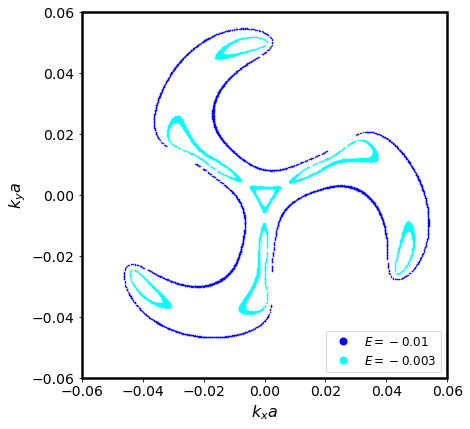

In [23]:
plt.rcParams['figure.figsize'] = 6.5, 6.5
#plt.rcParams["legend.handlelength"] = 1.0
fig=plt.subplot(111, aspect=1.0)

plt.plot(kx_data[0][1], ky_data[0][1], '.', color='blue', label=r'$E=-0.01$', markersize=1)
plt.plot(kx_data[1][1], ky_data[1][1], '.', color='cyan', label=r'$E=-0.003$', markersize=1)
#plt.plot(kx_data[2][1], ky_data[2][1], '.', color='red', label=r'$E=0.003$', markersize=1)
#plt.plot(kx_data[3][1], ky_data[3][1], '.', color='magenta', label=r'$E=0.01$', markersize=1)


standartize_figure(fig,
    axes_labels=[r"$k_{x}a$", r"$k_{y}a$"],
    rotate_ylabel=False,
    axes_limits=[-0.06, 0.06, -0.06, 0.06],
    legend=True,
    legend_label=None,
    legend_position='lower right',
    legend_box=False,
    ticks_fontsize=14,
    axes_label_fontsize=16,
    ylabelpad=24,
    legend_fontsize=12)
legends = [c for c in fig.get_children() if isinstance(c, mpl.legend.Legend)]
for legend in legends:
    for legend_handle in legend.legendHandles:
        legend_handle._legmarker.set_markersize(14)
plt.savefig('TBLG_constant_energy_075magic_minus.pdf', dpi=None, facecolor='w', edgecolor='w',
     orientation='portrait', format='pdf',
      transparent=False, bbox_inches=None, pad_inches=0.1,
     metadata=None)

#plt.savefig('TBLG_constant_energy_075magic_plus.pdf', dpi=None, facecolor='w', edgecolor='w',
#     orientation='portrait', format='pdf',
#      transparent=False, bbox_inches=None, pad_inches=0.1,
#     metadata=None)

plt.show()

## Generating DoS for NRG calculations

In [33]:
print(np.logspace(0.0, 5000, num=51, endpoint=True, base=1.0/1.0015, dtype=None, axis=0))

[1.00000000e+00 8.60804715e-01 7.40984757e-01 6.37843172e-01
 5.49058410e-01 4.72632068e-01 4.06843913e-01 3.50213158e-01
 3.01465138e-01 2.59502612e-01 2.23381072e-01 1.92287480e-01
 1.65521969e-01 1.42482091e-01 1.22649256e-01 1.05577058e-01
 9.08812293e-02 7.82309906e-02 6.73416056e-02 5.79679716e-02
 4.98991032e-02 4.29533833e-02 3.69744749e-02 3.18278023e-02
 2.73975223e-02 2.35839164e-02 2.03011464e-02 1.74753225e-02
 1.50428400e-02 1.29489476e-02 1.11465152e-02 9.59497281e-03
 8.25939783e-03 7.10972859e-03 6.12008789e-03 5.26820051e-03
 4.53489184e-03 3.90365628e-03 3.36028573e-03 2.89254980e-03
 2.48992050e-03 2.14333531e-03 1.84499314e-03 1.58817879e-03
 1.36711179e-03 1.17681628e-03 1.01300900e-03 8.72002923e-04
 7.50624228e-04 6.46140874e-04 5.56201111e-04]


In [39]:
#magic angle regime
vFpar = 4.31074647887324
wpar=0.11
Theta_names = ['1d05', '1d10', '1d0', '1d025', '1d075', '0d95', '1d15', '0d75', '1d25']
angle_radian = 0.0174533
angle_set = [0.018326, angle_radian*1.1, angle_radian*1.0, angle_radian*1.025, angle_radian*1.075, 
             angle_radian*0.95, angle_radian*1.15, angle_radian*0.75, angle_radian*1.25]
for i in range(5): 
    Thetapar = angle_set[i]
    mu_set_for_DOS_NRG = 0.12*np.logspace(0.0, 5000, num=2501, endpoint=True, base=1.0/1.0015, dtype=None, axis=0)
    dos_data_magic_NRG = generate_dos_Twisted_graphene_vectorized(energy_set=mu_set_for_DOS_NRG, vF=vFpar, w=wpar, 
                                                          gamma=0.0005, Theta=Thetapar, npoints=450, 
                                                          interval_size = 0.15)

    data_arr = np.asarray([[mu_set_for_DOS_NRG[i], dos_data_magic_NRG[i]] for i in range(len(mu_set_for_DOS_NRG))])
    np.savetxt('Theta'+Theta_names[i]+'_gamma_0d0005_interval_012_times_1d002_in_x.csv', data_arr, delimiter=",")

608851
608851
608851
608851
608851


# Reduced BMD model with particle-hole symmetry

## Checking symmetry and Dirac cones

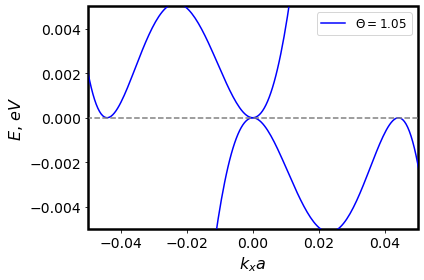

In [12]:
vFpar = 4.31074647887324
wpar=0.11
Thetapar = 0.018326
kx_space, spec = generate_spectrum_Twisted_graphene_2D(vF=vFpar, w=wpar, Theta=Thetapar, 
                                                       npoints=401, interval_size=0.1, ky_fixed=0.0, symmetric=True)
fig = plt.subplot(111)

plt.plot(kx_space, spec[:,0], '-', color='blue', label=r'$\Theta=1.05$')
for i in range(7):
    plt.plot(kx_space, spec[:,i+1], '-', color='blue')

plt.plot([min(kx_space), max(kx_space)], [0.0, 0.0], '--', color='gray')    
    
standartize_figure(fig,
    axes_labels=[r"$k_x a$", r"$E,\, eV$"],
    rotate_ylabel=False,
    axes_limits=[min(kx_space)/2, max(kx_space)/2, -0.005, 0.005],
    legend=True,
    legend_label=None,
    legend_position='upper right',
    legend_box=False,
    ticks_fontsize=14,
    axes_label_fontsize=16,
    ylabelpad=24,
    legend_fontsize=12)
plt.show()

In [13]:
0.9*1.05

0.9450000000000001

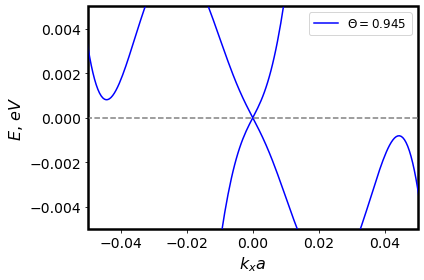

In [15]:
vFpar = 4.31074647887324
wpar=0.11
Thetapar = 0.018326
kx_space, spec = generate_spectrum_Twisted_graphene_2D(vF=vFpar, w=wpar, Theta=0.9*Thetapar, 
                                                       npoints=401, interval_size=0.1, ky_fixed=0.0, symmetric=True)
fig = plt.subplot(111)

plt.plot(kx_space, spec[:,0], '-', color='blue', label=r'$\Theta=0.945$')
for i in range(7):
    plt.plot(kx_space, spec[:,i+1], '-', color='blue')
plt.plot([min(kx_space), max(kx_space)], [0.0, 0.0], '--', color='gray')    
    
standartize_figure(fig,
    axes_labels=[r"$k_x a$", r"$E,\, eV$"],
    rotate_ylabel=False,
    axes_limits=[min(kx_space)/2, max(kx_space)/2, -0.005, 0.005],
    legend=True,
    legend_label=None,
    legend_position='upper right',
    legend_box=False,
    ticks_fontsize=14,
    axes_label_fontsize=16,
    ylabelpad=24,
    legend_fontsize=12)
plt.show()

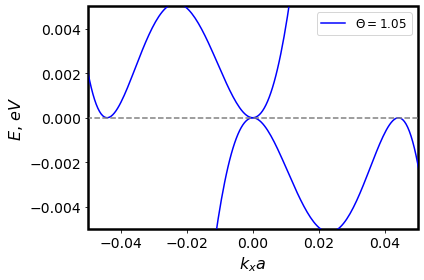

In [16]:
vFpar = 4.31074647887324
wpar=0.11
Thetapar = 0.018326
kx_space, spec = generate_spectrum_Twisted_graphene_2D(vF=vFpar, w=wpar, Theta=Thetapar, 
                                                       npoints=401, interval_size=0.1, ky_fixed=0.0, symmetric=True)
fig = plt.subplot(111)

plt.plot(kx_space, spec[:,3], '-', color='blue', label=r'$\Theta=1.05$')
plt.plot(kx_space, spec[:,4], '-', color='blue')


plt.plot([min(kx_space), max(kx_space)], [0.0, 0.0], '--', color='gray')    
    
standartize_figure(fig,
    axes_labels=[r"$k_x a$", r"$E,\, eV$"],
    rotate_ylabel=False,
    axes_limits=[min(kx_space)/2, max(kx_space)/2, -0.005, 0.005],
    legend=True,
    legend_label=None,
    legend_position='upper right',
    legend_box=False,
    ticks_fontsize=14,
    axes_label_fontsize=16,
    ylabelpad=24,
    legend_fontsize=12)
plt.show()

## Fitting parameters near vHs for Yuan model

### Magic angle regime with Theta = 1.05 - usual saddle point in maximum 

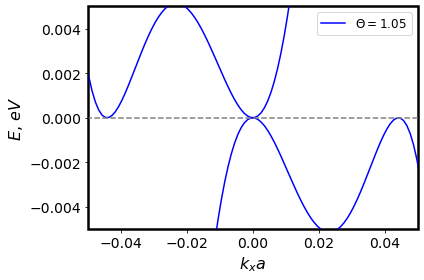

In [39]:
kx = np.linspace(-0.1, 0.1, 200)
spectrum = np.array([generate_spectrum_Twisted_graphene_single_point(vF=vFpar, w=wpar, Theta=Thetapar,  
                                                       kx_fixed = kxi, ky_fixed=0.0, symmetric=True) for kxi in kx])
fig = plt.subplot(111)

plt.plot(kx, spectrum[:,3], '-', color='blue', label=r'$\Theta=1.05$')
plt.plot(kx, spectrum[:,4], '-', color='blue')


plt.plot([min(kx), max(kx)], [0.0, 0.0], '--', color='gray')    
    
standartize_figure(fig,
    axes_labels=[r"$k_x a$", r"$E,\, eV$"],
    rotate_ylabel=False,
    axes_limits=[min(kx)/2, max(kx)/2, -0.005, 0.005],
    legend=True,
    legend_label=None,
    legend_position='upper right',
    legend_box=False,
    ticks_fontsize=14,
    axes_label_fontsize=16,
    ylabelpad=24,
    legend_fontsize=12)
plt.show()

In [41]:
# finding positions of minima and maxima
vFpar = 4.31074647887324
wpar=0.11
Thetapar = 0.018326
print('lower band minimum', fmin_tnc(lambda kxi: generate_spectrum_Twisted_graphene_single_point(vF=vFpar, w=wpar, Theta=Thetapar, 
                                                       kx_fixed = kxi, ky_fixed=0.0, symmetric=True)[3], 
               x0=[0.02], fprime=None, args=(), approx_grad=True, 
         bounds=[(0.0, 0.4)], epsilon=1e-08, scale=None, offset=None, 
         messages=15, maxCGit=- 1, maxfun=None, eta=- 1, stepmx=0, 
         accuracy=0, fmin=0, ftol=- 1, xtol=- 1, pgtol=- 1, rescale=- 1, disp=None, callback=None))
# finding positions of minima and maxima

print('upper band minimum', fmin_tnc(lambda kxi: generate_spectrum_Twisted_graphene_single_point(vF=vFpar, 
                                                       w=wpar, Theta=Thetapar,  
                                                       kx_fixed = kxi, ky_fixed=0.0, symmetric=True)[4], 
               x0=[-0.035], fprime=None, args=(), approx_grad=True, 
         bounds=[(-0.06, -0.03)], epsilon=1e-08, scale=None, offset=None, 
         messages=15, maxCGit=- 1, maxfun=None, eta=- 1, stepmx=0, 
         accuracy=0, fmin=0, ftol=- 1, xtol=- 1, pgtol=- 1, rescale=- 1, disp=None, callback=None))

lower band minimum (array([0.02323344]), 22, 1)
upper band minimum (array([-0.04419646]), 18, 1)


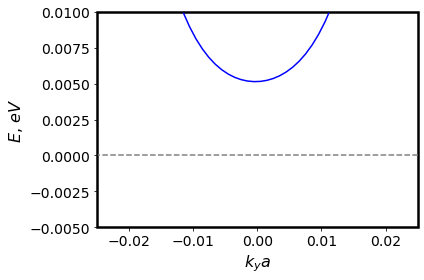

In [42]:
ky = np.linspace(-0.1, 0.1, 200)
spectrum = np.array([generate_spectrum_Twisted_graphene_single_point(vF=vFpar, w=wpar, Theta=Thetapar, 
                                                       kx_fixed = -0.02323344, ky_fixed=kyi, symmetric=True) for kyi in ky])
fig = plt.subplot(111)

#plt.plot(ky, spectrum[:,3], '-', color='blue', label=r'$\Theta=1.05$')
plt.plot(ky, spectrum[:,4], '-', color='blue')


plt.plot([min(ky), max(ky)], [0.0, 0.0], '--', color='gray')    
    
standartize_figure(fig,
    axes_labels=[r"$k_y a$", r"$E,\, eV$"],
    rotate_ylabel=False,
    axes_limits=[min(ky)/4, max(ky)/4, -0.005, 0.01],
    legend=False,
    legend_label=None,
    legend_position='upper right',
    legend_box=False,
    ticks_fontsize=14,
    axes_label_fontsize=16,
    ylabelpad=24,
    legend_fontsize=12)
plt.show()

In [36]:
#curve fitting for saddle point. We know that saddle point is at the maximum of lower band level - Ev is this
print(generate_spectrum_Twisted_graphene_single_point(vF=vFpar, w=wpar, Theta=Thetapar, 
                                                       npoints=401, interval_size=0.1, 
                                                       kx_fixed = -0.02323344, ky_fixed=0.0, symmetric=True)[4])

0.005143144630787344


In [76]:
#curve fitting around saddle point. We take points in the ranges: kx a in (-0.05, -0.015), 
#ky a in (-0.01, 0.01), Ev = 0.005143144630787344
#function to fit - - alpha kx^2 + beta ky^2 + gamma kx ky^2 + kappa ky^4


def approximate_dispersion_magic(kxy, alpha, beta, gamma, kappa):
    '''note that this function contains exact value of 
    E_v calculated for magic angle'''
    kx = kxy[:,0]
    ky = kxy[:,1]
    return 0.005143144630787344-alpha*kx**2+beta*ky**2+gamma*kx*ky**2+kappa*ky**4


vFpar = 4.31074647887324
wpar=0.11
Thetapar = 0.018326
kx_vec = np.linspace(-0.035, -0.01, 40)
ky_vec = np.linspace(-0.008, 0.008, 40)
#kxy - origin at the saddle point
kxy_data = np.array([[kx_vec[i]+0.02323344, ky_vec[j]] for i in range(len(kx_vec)) for j in range(len(ky_vec))])
#print(kxy_data[:,0])
spectrum_data = [generate_spectrum_Twisted_graphene_single_point(vF=vFpar, 
                                        w=wpar, Theta=Thetapar,  
                                    kx_fixed = kxy_data[i][0]-0.02323344, 
                                    ky_fixed=kxy_data[i][1], symmetric=True)[4] for i in range(len(kxy_data))]
#print(spectrum_data)
print(curve_fit(f=approximate_dispersion_magic, 
                         xdata = kxy_data, 
                         ydata = spectrum_data, 
                         p0 = (0.2, 0.2, 0.1, 0.1), 
                         sigma=None, 
                         absolute_sigma=False, 
                         check_finite=True,  
                         method=None, 
                         jac=None))
print('this is the answer for alpha, beta, gamma, kappa: ', list(curve_fit(f=approximate_dispersion_magic, 
                         xdata = kxy_data, 
                         ydata = spectrum_data, 
                         p0 = (0.2, 0.2, 0.1, 0.1), 
                         sigma=None, 
                         absolute_sigma=False, 
                         check_finite=True,  
                         method=None, 
                         jac=None)[0]))

(array([1.89381377e+01, 2.54013569e+01, 2.44602475e+03, 7.54977352e+04]), array([[ 2.12247131e-03,  8.12078170e-03,  7.71877363e-02,
        -1.09797096e+02],
       [ 8.12078170e-03,  1.27278518e-01,  1.91196371e-01,
        -2.26169850e+03],
       [ 7.71877363e-02,  1.91196371e-01,  1.44784064e+02,
        -3.99298564e+03],
       [-1.09797096e+02, -2.26169850e+03, -3.99298564e+03,
         4.40638381e+07]]))
this is the answer for alpha, beta, gamma, kappa:  [18.938137729549098, 25.40135687385642, 2446.0247523828284, 75497.73517140912]


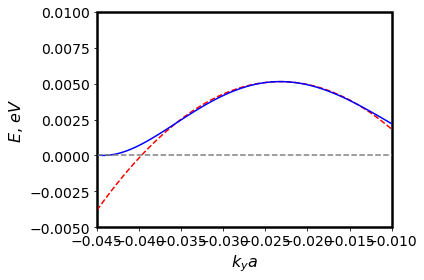

In [70]:
#plotting to check in 2D - along ky
kx_vec = np.linspace(-0.045, -0.01, 100)
ky_vec = [0.0]
kxy_data = np.array([[kx_vec[i]+0.02323344, ky_vec[j]] for i in range(len(kx_vec)) for j in range(len(ky_vec))])
apprx_disp_data = approximate_dispersion_magic(kxy_data, 1.89381377e+01, 2.54013569e+01, 2.44602475e+03, 7.54977352e+04)
spectrum_data = [generate_spectrum_Twisted_graphene_single_point(vF=vFpar, 
                                        w=wpar, Theta=Thetapar,  
                                    kx_fixed = kxy_data[i][0]-0.02323344, 
                                    ky_fixed=kxy_data[i][1], symmetric=True)[4] for i in range(len(kxy_data))]

fig = plt.subplot(111)

#check approximation
plt.plot(kx_vec, apprx_disp_data, '--', color='red')

#exact spectrum
plt.plot(kx_vec, spectrum_data, '-', color='blue')


plt.plot([min(kx_vec), max(kx_vec)], [0.0, 0.0], '--', color='gray')    
    
standartize_figure(fig,
    axes_labels=[r"$k_y a$", r"$E,\, eV$"],
    rotate_ylabel=False,
    axes_limits=[min(kx_vec), max(kx_vec), -0.005, 0.01],
    legend=False,
    legend_label=None,
    legend_position='upper right',
    legend_box=False,
    ticks_fontsize=14,
    axes_label_fontsize=16,
    ylabelpad=24,
    legend_fontsize=12)
plt.show()

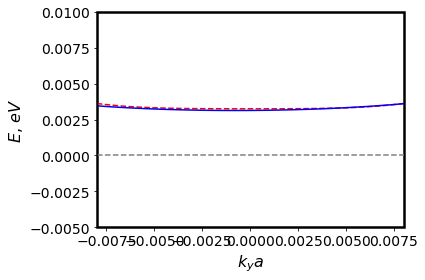

In [74]:
#plotting to check in 2D - along ky
kx_vec = [-0.02323344-0.01]
ky_vec = np.linspace(-0.008, 0.008, 40)
kxy_data = np.array([[kx_vec[i]+0.02323344, ky_vec[j]] for i in range(len(kx_vec)) for j in range(len(ky_vec))])
apprx_disp_data = approximate_dispersion_magic(kxy_data, 1.89381377e+01, 2.54013569e+01, 2.44602475e+03, 7.54977352e+04)
spectrum_data = [generate_spectrum_Twisted_graphene_single_point(vF=vFpar, 
                                        w=wpar, Theta=Thetapar,  
                                    kx_fixed = kxy_data[i][0]-0.02323344, 
                                    ky_fixed=kxy_data[i][1], symmetric=True)[4] for i in range(len(kxy_data))]

fig = plt.subplot(111)

#check approximation
plt.plot(ky_vec, apprx_disp_data, '--', color='red')

#exact spectrum
plt.plot(ky_vec, spectrum_data, '-', color='blue')


plt.plot([min(ky_vec), max(ky_vec)], [0.0, 0.0], '--', color='gray')    
    
standartize_figure(fig,
    axes_labels=[r"$k_y a$", r"$E,\, eV$"],
    rotate_ylabel=False,
    axes_limits=[min(ky_vec), max(ky_vec), -0.005, 0.01],
    legend=False,
    legend_label=None,
    legend_position='upper right',
    legend_box=False,
    ticks_fontsize=14,
    axes_label_fontsize=16,
    ylabelpad=24,
    legend_fontsize=12)
plt.show()

### Contour plots for search of saddle points in symmetric model

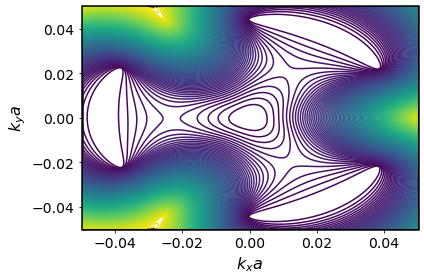

In [13]:
#contour plots for the saddle point positioning - magic angle
vFpar = 4.31074647887324
wpar=0.11
Thetapar = 0.018326
X = np.linspace(-0.05, 0.05, 400)
Y = np.linspace(-0.05, 0.05, 400)
Zspec = np.array([[generate_spectrum_Twisted_graphene_single_point(vF=vFpar, w=wpar, Theta=Thetapar, 
                                                       kx_fixed = kxi, ky_fixed=kyi, symmetric=True)[4] for kxi in X] for kyi in Y])


fig = plt.subplot(111)
#plt.contour(X, Y, Zspec, colors='black', levels=50)
plt.contour(X, Y, Zspec, levels=120)
standartize_figure(fig,
    axes_labels=[r"$k_x a$", r"$k_y a$"],
    rotate_ylabel=False,
    axes_limits=[-0.05, 0.05, -0.05, 0.05],
    legend=False,
    legend_label=None,
    legend_position='upper right',
    legend_box=False,
    ticks_fontsize=14,
    axes_label_fontsize=16,
    ylabelpad=24,
    legend_fontsize=12)
plt.show()

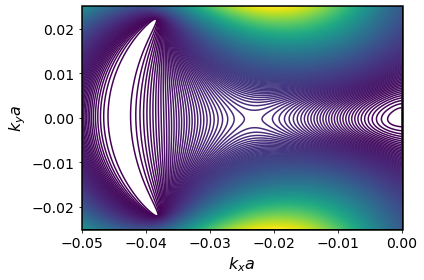

In [21]:
#contour plots for the saddle point positioning - magic angle
vFpar = 4.31074647887324
wpar=0.11
Thetapar = 0.018326
X = np.linspace(-0.05, 0.0, 400)
Y = np.linspace(-0.025, 0.025, 400)
Zspec = np.array([[generate_spectrum_Twisted_graphene_single_point(vF=vFpar, w=wpar, Theta=Thetapar, 
                                                       kx_fixed = kxi, ky_fixed=kyi, symmetric=True)[4] for kxi in X] for kyi in Y])


fig = plt.subplot(111)
#plt.contour(X, Y, Zspec, colors='black', levels=50)
plt.contour(X, Y, Zspec, levels=300)
standartize_figure(fig,
    axes_labels=[r"$k_x a$", r"$k_y a$"],
    rotate_ylabel=False,
    axes_limits=[-0.05, 0.0, -0.025, 0.025],
    legend=False,
    legend_label=None,
    legend_position='upper right',
    legend_box=False,
    ticks_fontsize=14,
    axes_label_fontsize=16,
    ylabelpad=24,
    legend_fontsize=12)
plt.show()

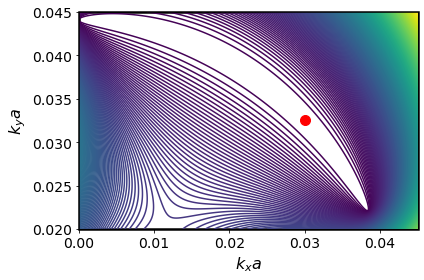

In [52]:
#contour plots for the saddle point positioning - magic angle
vFpar = 4.31074647887324
wpar=0.11
Thetapar = 0.018326
X = np.linspace(0.0, 0.045, 400)
Y = np.linspace(0.02, 0.045, 400)
Zspec = np.array([[generate_spectrum_Twisted_graphene_single_point(vF=vFpar, w=wpar, Theta=Thetapar, 
                                                       kx_fixed = kxi, ky_fixed=kyi, symmetric=True)[4] for kxi in X] for kyi in Y])


fig = plt.subplot(111)
#plt.contour(X, Y, Zspec, colors='black', levels=50)
plt.contour(X, Y, Zspec, levels=300)
plt.plot([-0.05, 0.05], [0.0, 0.0], '--', color='gray')
plt.plot([0.02999899], [0.03255864], 'bo', color='red', markersize=10)
standartize_figure(fig,
    axes_labels=[r"$k_x a$", r"$k_y a$"],
    rotate_ylabel=False,
    axes_limits=[0.0, 0.045, 0.02, 0.045],
    legend=False,
    legend_label=None,
    legend_position='upper right',
    legend_box=False,
    ticks_fontsize=14,
    axes_label_fontsize=16,
    ylabelpad=24,
    legend_fontsize=12)
plt.show()

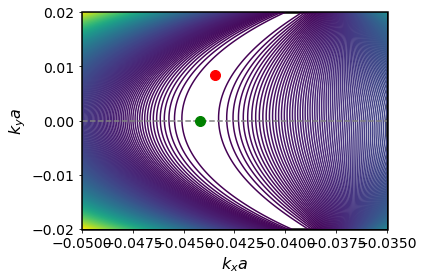

In [69]:
#contour plots for the saddle point positioning - magic angle
vFpar = 4.31074647887324
wpar=0.11
Thetapar = 0.018326
X = np.linspace(-0.05, -0.035, 400)
Y = np.linspace(-0.02, 0.02, 400)
Zspec = np.array([[generate_spectrum_Twisted_graphene_single_point(vF=vFpar, w=wpar, Theta=Thetapar, 
                                                       kx_fixed = kxi, ky_fixed=kyi, symmetric=True)[4] for kxi in X] for kyi in Y])


fig = plt.subplot(111)
#plt.contour(X, Y, Zspec, colors='black', levels=50)
plt.contour(X, Y, Zspec, levels=300)
plt.plot([-0.05, 0.05], [0.0, 0.0], '--', color='gray')
plt.plot([-0.04346813], [0.00834882], 'bo', color='red', markersize=10)
plt.plot([-0.04419799], [0.00], 'bo', color='green', markersize=10)


standartize_figure(fig,
    axes_labels=[r"$k_x a$", r"$k_y a$"],
    rotate_ylabel=False,
    axes_limits=[-0.05, -0.035, -0.02, 0.02],
    legend=False,
    legend_label=None,
    legend_position='upper right',
    legend_box=False,
    ticks_fontsize=14,
    axes_label_fontsize=16,
    ylabelpad=24,
    legend_fontsize=12)
plt.show()

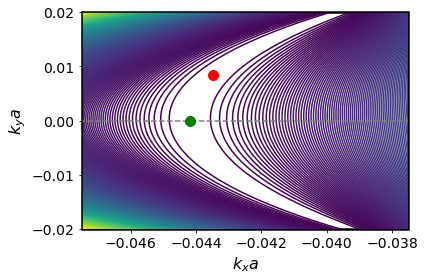

In [71]:
#contour plots for the saddle point positioning - magic angle
vFpar = 4.31074647887324
wpar=0.11
Thetapar = 0.018326
X = np.linspace(-0.0475, -0.0375, 400)
Y = np.linspace(-0.02, 0.02, 400)
Zspec = np.array([[generate_spectrum_Twisted_graphene_single_point(vF=vFpar, w=wpar, Theta=Thetapar, 
                                                       kx_fixed = kxi, ky_fixed=kyi, symmetric=True)[4] for kxi in X] for kyi in Y])


fig = plt.subplot(111)
#plt.contour(X, Y, Zspec, colors='black', levels=50)
plt.contour(X, Y, Zspec, levels=500)
plt.plot([-0.05, 0.05], [0.0, 0.0], '--', color='gray')
plt.plot([-0.04346813], [0.00834882], 'bo', color='red', markersize=10)
plt.plot([-0.04419799], [0.00], 'bo', color='green', markersize=10)


standartize_figure(fig,
    axes_labels=[r"$k_x a$", r"$k_y a$"],
    rotate_ylabel=False,
    axes_limits=[-0.0475, -0.0375, -0.02, 0.02],
    legend=False,
    legend_label=None,
    legend_position='upper right',
    legend_box=False,
    ticks_fontsize=14,
    axes_label_fontsize=16,
    ylabelpad=24,
    legend_fontsize=12)
plt.show()

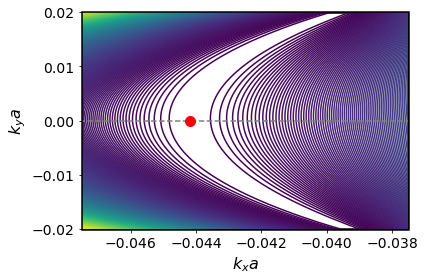

In [3]:
#contour plots for the saddle point positioning - magic angle
vFpar = 4.31074647887324
wpar=0.11
Thetapar = 0.018326
X = np.linspace(-0.0475, -0.0375, 400)
Y = np.linspace(-0.02, 0.02, 400)
Zspec = np.array([[generate_spectrum_Twisted_graphene_single_point(vF=vFpar, w=wpar, Theta=Thetapar, 
                                                       kx_fixed = kxi, ky_fixed=kyi, symmetric=True)[4] for kxi in X] for kyi in Y])


fig = plt.subplot(111)
#plt.contour(X, Y, Zspec, colors='black', levels=50)
plt.contour(X, Y, Zspec, levels=500)
plt.plot([-0.05, 0.05], [0.0, 0.0], '--', color='gray')
#plt.plot([-0.04346813], [0.00834882], 'bo', color='red', markersize=10)
plt.plot([-0.04419799], [0.00], 'bo', color='red', markersize=10)


standartize_figure(fig,
    axes_labels=[r"$k_x a$", r"$k_y a$"],
    rotate_ylabel=False,
    axes_limits=[-0.0475, -0.0375, -0.02, 0.02],
    legend=False,
    legend_label=None,
    legend_position='upper right',
    legend_box=False,
    ticks_fontsize=14,
    axes_label_fontsize=16,
    ylabelpad=24,
    legend_fontsize=12)
plt.show()

In [68]:
print(minimize(lambda x: generate_spectrum_Twisted_graphene_single_point(vF=vFpar, w=wpar, Theta=Thetapar, 
                                                       kx_fixed = x, ky_fixed=0.0, symmetric=True)[4], x0=[-0.045],
               bounds=[(-0.0475,-0.0425)]))

      fun: 7.176511237071162e-07
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([2.95579093e-07])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 6
      nit: 1
     njev: 3
   status: 0
  success: True
        x: array([-0.04419799])


In [31]:
#more precise magic angle
print(minimize(lambda x: generate_spectrum_Twisted_graphene_single_point(vF=vFpar, w=wpar, Theta=0.0182759, 
                                                       kx_fixed = x, ky_fixed=0.0, symmetric=True)[4], x0=[-0.045],
               bounds=[(-0.0475,-0.0425)]))

      fun: 8.96885297348703e-15
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([-1.03151144e-07])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 6
      nit: 1
     njev: 3
   status: 0
  success: True
        x: array([-0.04419782])


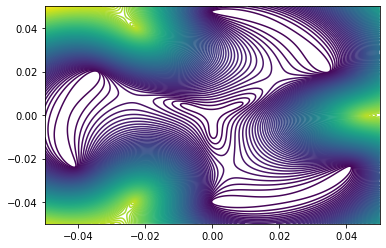

In [7]:
#contour plots for the saddle point positioning - 0.9 magic angle
vFpar = 4.31074647887324
wpar=0.11
Thetapar = 0.9*0.018326
X = np.linspace(-0.05, 0.05, 400)
Y = np.linspace(-0.05, 0.05, 400)
Zspec = np.array([[generate_spectrum_Twisted_graphene_single_point(vF=vFpar, w=wpar, Theta=Thetapar, 
                                                       kx_fixed = kxi, ky_fixed=kyi, symmetric=True)[4] for kxi in X] for kyi in Y])


fig = plt.subplot(111)
#plt.contour(X, Y, Zspec, colors='black', levels=50)
plt.contour(X, Y, Zspec, levels=120)
# standartize_figure(fig,
#     axes_labels=[r"$k_x a$", r"$k_y a$"],
#     rotate_ylabel=False,
#     axes_limits=[-0.05, 0.05, -0.05, 0.05],
#     legend=False,
#     legend_label=None,
#     legend_position='upper right',
#     legend_box=False,
#     ticks_fontsize=14,
#     axes_label_fontsize=16,
#     ylabelpad=24,
#     legend_fontsize=12)
plt.show()

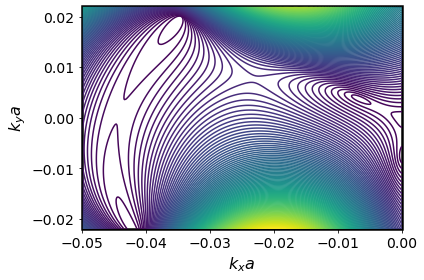

In [18]:
#contour plots for the saddle point positioning - 0.95 magic angle
vFpar = 4.31074647887324
wpar=0.11
Thetapar = 0.9*0.018326
X = np.linspace(-0.05, 0.0, 400)
Y = np.linspace(-0.022, 0.022, 400)
Zspec = np.array([[generate_spectrum_Twisted_graphene_single_point(vF=vFpar, w=wpar, Theta=Thetapar, 
                                                       kx_fixed = kxi, ky_fixed=kyi, symmetric=True)[4] for kxi in X] for kyi in Y])


fig = plt.subplot(111)
#plt.contour(X, Y, Zspec, colors='black', levels=50)
plt.contour(X, Y, Zspec, levels=120)
standartize_figure(fig,
    axes_labels=[r"$k_x a$", r"$k_y a$"],
    rotate_ylabel=False,
    axes_limits=[-0.05, 0.0, -0.022, 0.022],
    legend=False,
    legend_label=None,
    legend_position='upper right',
    legend_box=False,
    ticks_fontsize=14,
    axes_label_fontsize=16,
    ylabelpad=24,
    legend_fontsize=12)
plt.show()

<ipython-input-6-4db119b9b275>:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot([-0.0440341], [ 0.00111646], 'bo', color='red', markersize=10)


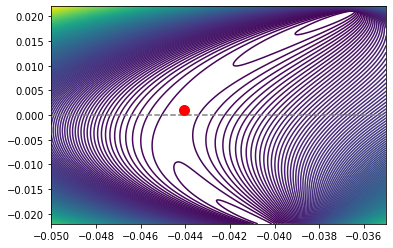

In [6]:
#contour plots for the saddle point positioning - 0.95 magic angle
vFpar = 4.31074647887324
wpar=0.11
Thetapar = 0.95*0.018326
X = np.linspace(-0.05, -0.035, 400)
Y = np.linspace(-0.022, 0.022, 400)
Zspec = np.array([[generate_spectrum_Twisted_graphene_single_point(vF=vFpar, w=wpar, Theta=Thetapar, 
                                                       kx_fixed = kxi, ky_fixed=kyi, symmetric=True)[4] for kxi in X] for kyi in Y])


fig = plt.subplot(111)
#plt.contour(X, Y, Zspec, colors='black', levels=50)
plt.contour(X, Y, Zspec, levels=300)
plt.plot([-0.05, 0.05], [0.0, 0.0], '--', color='gray')
plt.plot([-0.0440341], [ 0.00111646], 'bo', color='red', markersize=10)
plt.xlim(-0.05, -0.035)
plt.ylim(-0.022, 0.022)
# standartize_figure(fig,
#     axes_labels=[r"$k_x a$", r"$k_y a$"],
#     rotate_ylabel=False,
#     axes_limits=[-0.05, -0.035, -0.022, 0.022],
#     legend=False,
#     legend_label=None,
#     legend_position='upper right',
#     legend_box=False,
#     ticks_fontsize=14,
#     axes_label_fontsize=16,
#     ylabelpad=24,
#     legend_fontsize=12)
plt.show()

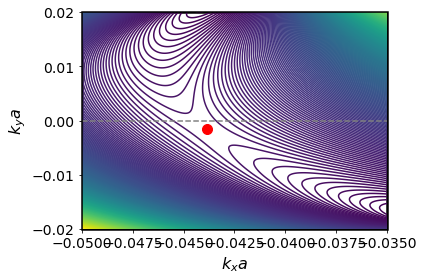

In [37]:
#contour plots for the saddle point positioning - 1.1 magic angle
vFpar = 4.31074647887324
wpar=0.11
Thetapar = 1.1*0.018326
X = np.linspace(-0.05, -0.035, 400)
Y = np.linspace(-0.02, 0.02, 400)
Zspec = np.array([[generate_spectrum_Twisted_graphene_single_point(vF=vFpar, w=wpar, Theta=Thetapar, 
                                                       kx_fixed = kxi, ky_fixed=kyi, symmetric=True)[4] for kxi in X] for kyi in Y])


fig = plt.subplot(111)
#plt.contour(X, Y, Zspec, colors='black', levels=50)
plt.contour(X, Y, Zspec, levels=300)
plt.plot([-0.05, 0.05], [0.0, 0.0], '--', color='gray')
plt.plot([-0.04386039], [-0.00165233], 'bo', color='red', markersize=10)
standartize_figure(fig,
    axes_labels=[r"$k_x a$", r"$k_y a$"],
    rotate_ylabel=False,
    axes_limits=[-0.05, -0.035, -0.02, 0.02],
    legend=False,
    legend_label=None,
    legend_position='upper right',
    legend_box=False,
    ticks_fontsize=14,
    axes_label_fontsize=16,
    ylabelpad=24,
    legend_fontsize=12)
plt.show()

### Gradient zero search

In [34]:
def dispersion_gradient_band_4_sym(kxy):
    vFpar = 4.31074647887324
    wpar=0.11
    Thetapar = 1.1*0.018326
    dh = 0.001
    spec_point_1 = generate_spectrum_Twisted_graphene_single_point(vF=vFpar, w=wpar, Theta=Thetapar, 
                                                       kx_fixed = kxy[0]-dh, ky_fixed=kxy[1], symmetric=True)[4]
    spec_point_2 = generate_spectrum_Twisted_graphene_single_point(vF=vFpar, w=wpar, Theta=Thetapar, 
                                                       kx_fixed = kxy[0]+dh, ky_fixed=kxy[1], symmetric=True)[4]
    spec_point_3 = generate_spectrum_Twisted_graphene_single_point(vF=vFpar, w=wpar, Theta=Thetapar, 
                                                       kx_fixed = kxy[0], ky_fixed=kxy[1]-dh, symmetric=True)[4]
    spec_point_4 = generate_spectrum_Twisted_graphene_single_point(vF=vFpar, w=wpar, Theta=Thetapar, 
                                                       kx_fixed = kxy[0], ky_fixed=kxy[1]+dh, symmetric=True)[4]
    
    return ((spec_point_2-spec_point_1)/(2*dh))**2+((spec_point_4-spec_point_3)/(2*dh))**2


print(minimize(dispersion_gradient_band_4_sym, x0=[-0.425, 0.0], bounds=[(-0.05, 0.03), (-0.02, 0.02)]))


      fun: 6.524816620491646e-12
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-7.52220350e-05, -2.10591252e-05])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 60
      nit: 12
     njev: 20
   status: 0
  success: True
        x: array([-0.04386039, -0.00165233])


In [36]:
def dispersion_gradient_band_4_sym(kxy):
    vFpar = 4.31074647887324
    wpar=0.11
    Thetapar = 0.9*0.018326
    dh = 0.001
    spec_point_1 = generate_spectrum_Twisted_graphene_single_point(vF=vFpar, w=wpar, Theta=Thetapar, 
                                                       kx_fixed = kxy[0]-dh, ky_fixed=kxy[1], symmetric=True)[4]
    spec_point_2 = generate_spectrum_Twisted_graphene_single_point(vF=vFpar, w=wpar, Theta=Thetapar, 
                                                       kx_fixed = kxy[0]+dh, ky_fixed=kxy[1], symmetric=True)[4]
    spec_point_3 = generate_spectrum_Twisted_graphene_single_point(vF=vFpar, w=wpar, Theta=Thetapar, 
                                                       kx_fixed = kxy[0], ky_fixed=kxy[1]-dh, symmetric=True)[4]
    spec_point_4 = generate_spectrum_Twisted_graphene_single_point(vF=vFpar, w=wpar, Theta=Thetapar, 
                                                       kx_fixed = kxy[0], ky_fixed=kxy[1]+dh, symmetric=True)[4]
    
    return ((spec_point_2-spec_point_1)/(2*dh))**2+((spec_point_4-spec_point_3)/(2*dh))**2


print(minimize(dispersion_gradient_band_4_sym, x0=[-0.425, 0.0], bounds=[(-0.05, -0.035), (-0.02, 0.02)]))

      fun: 2.306463144794811e-11
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-0.0003762 ,  0.00011997])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 75
      nit: 18
     njev: 25
   status: 0
  success: True
        x: array([-0.0440341 ,  0.00111646])


In [63]:
def dispersion_gradient_band_4_sym(kxy):
    vFpar = 4.31074647887324
    wpar=0.11
    Thetapar = 1.0*0.018326
    dh = 0.0002
    spec_point_1 = generate_spectrum_Twisted_graphene_single_point(vF=vFpar, w=wpar, Theta=Thetapar, 
                                                       kx_fixed = kxy[0]-dh, ky_fixed=kxy[1], symmetric=True)[4]
    spec_point_2 = generate_spectrum_Twisted_graphene_single_point(vF=vFpar, w=wpar, Theta=Thetapar, 
                                                       kx_fixed = kxy[0]+dh, ky_fixed=kxy[1], symmetric=True)[4]
    spec_point_3 = generate_spectrum_Twisted_graphene_single_point(vF=vFpar, w=wpar, Theta=Thetapar, 
                                                       kx_fixed = kxy[0], ky_fixed=kxy[1]-dh, symmetric=True)[4]
    spec_point_4 = generate_spectrum_Twisted_graphene_single_point(vF=vFpar, w=wpar, Theta=Thetapar, 
                                                       kx_fixed = kxy[0], ky_fixed=kxy[1]+dh, symmetric=True)[4]
    
    return 1000000*((spec_point_2-spec_point_1)/(2*dh))**2+1000000*((spec_point_4-spec_point_3)/(2*dh))**2


print(minimize(dispersion_gradient_band_4_sym, x0=[-0.425, -0.0], bounds=[(-0.05, -0.035), (-0.02, 0.02)]))

      fun: 0.0007952882791233745
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([134.80037312,   3.6543194 ])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 75
      nit: 7
     njev: 25
   status: 0
  success: True
        x: array([-0.04346813,  0.00834882])


In [57]:
def dispersion_gradient_band_4_sym(kxy):
    vFpar = 4.31074647887324
    wpar=0.11
    Thetapar = 1.0*0.018326
    dh = 0.0002
    spec_point_1 = generate_spectrum_Twisted_graphene_single_point(vF=vFpar, w=wpar, Theta=Thetapar, 
                                                       kx_fixed = kxy[0]-dh, ky_fixed=kxy[1], symmetric=True)[4]
    spec_point_2 = generate_spectrum_Twisted_graphene_single_point(vF=vFpar, w=wpar, Theta=Thetapar, 
                                                       kx_fixed = kxy[0]+dh, ky_fixed=kxy[1], symmetric=True)[4]
    spec_point_3 = generate_spectrum_Twisted_graphene_single_point(vF=vFpar, w=wpar, Theta=Thetapar, 
                                                       kx_fixed = kxy[0], ky_fixed=kxy[1]-dh, symmetric=True)[4]
    spec_point_4 = generate_spectrum_Twisted_graphene_single_point(vF=vFpar, w=wpar, Theta=Thetapar, 
                                                       kx_fixed = kxy[0], ky_fixed=kxy[1]+dh, symmetric=True)[4]
    
    return 1000000*((spec_point_2-spec_point_1)/(2*dh))**2+1000000*((spec_point_4-spec_point_3)/(2*dh))**2


print(minimize(dispersion_gradient_band_4_sym, x0=[0.025, -0.2], bounds=[(0.0, 0.03), (0.028, 0.045)]))

      fun: 6.22040290931772e-05
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([24.1016064 , 66.33010125])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 141
      nit: 10
     njev: 47
   status: 0
  success: True
        x: array([0.02338693, 0.03751721])


### Decompositions arond saddle points

In [81]:
Thetapar = 1.0*0.018326
print(generate_spectrum_Twisted_graphene_single_point(vF=vFpar, w=wpar, Theta=Thetapar, 
                                                       kx_fixed = -0.04419799, ky_fixed=0.0, symmetric=True)[4])

7.176511245053104e-07


In [80]:
#magic angle
def approximate_dispersion_magic(kxy, alpha, beta, gamma, kappa):
    '''note that this function contains exact value of 
    E_v calculated for magic angle'''
    kx = kxy[:,0]
    ky = kxy[:,1]
    return 7.176511245053104e-07+alpha*kx**2+beta*ky**2+gamma*kx*ky**2+kappa*ky**4


vFpar = 4.31074647887324
wpar=0.11
Thetapar = 0.018326
kx_vec = np.linspace(-0.047, -0.041, 100)
ky_vec = np.linspace(-0.008, 0.008, 100)
#kxy - origin at the saddle point
kxy_data = np.array([[kx_vec[i]+0.04419799, ky_vec[j]] for i in range(len(kx_vec)) for j in range(len(ky_vec))])
#print(kxy_data[:,0])
spectrum_data = [generate_spectrum_Twisted_graphene_single_point(vF=vFpar, 
                                        w=wpar, Theta=Thetapar,  
                                    kx_fixed = kxy_data[i][0]-0.04419799, 
                                    ky_fixed=kxy_data[i][1], symmetric=True)[4] for i in range(len(kxy_data))]
#print(spectrum_data)
print(curve_fit(f=approximate_dispersion_magic, 
                         xdata = kxy_data, 
                         ydata = spectrum_data, 
                         p0 = (0.2, 0.2, 0.1, 0.1), 
                         sigma=None, 
                         absolute_sigma=False, 
                         check_finite=True,  
                         method=None, 
                         jac=None))
print('this is the answer for alpha, beta, gamma, kappa: ', list(curve_fit(f=approximate_dispersion_magic, 
                         xdata = kxy_data, 
                         ydata = spectrum_data, 
                         p0 = (-0.2, -0.2, 0.1, 0.1), 
                         sigma=None, 
                         absolute_sigma=False, 
                         check_finite=True,  
                         method=None, 
                         jac=None)[0]))

(array([ 4.92069198e+01,  1.01680878e-01, -1.48597304e+03,  1.36342925e+04]), array([[ 3.99815909e-03, -8.78447158e-04, -4.04179115e-02,
         1.22261871e+01],
       [-8.78447158e-04,  7.94127287e-04,  5.71400590e-03,
        -1.45156009e+01],
       [-4.04179115e-02,  5.71400590e-03,  1.64009802e+01,
        -1.23596166e+02],
       [ 1.22261871e+01, -1.45156009e+01, -1.23596166e+02,
         2.91097708e+05]]))
this is the answer for alpha, beta, gamma, kappa:  [49.206920036973635, 0.10168067596553049, -1485.9730421869385, 13634.296232450133]


In [32]:
#more precise magic angle
Thetapar = 1.0*0.0182759
print(generate_spectrum_Twisted_graphene_single_point(vF=vFpar, w=wpar, Theta=Thetapar, 
                                                       kx_fixed = -0.04419782, ky_fixed=0.0, symmetric=True)[4])

7.308870396172413e-15


In [34]:
#more precise magic angle
def approximate_dispersion_magic(kxy, alpha, beta, gamma, kappa):
    '''note that this function contains exact value of 
    E_v calculated for magic angle'''
    kx = kxy[:,0]
    ky = kxy[:,1]
    return 7.308870396172413e-15+alpha*kx**2+beta*ky**2+gamma*kx*ky**2+kappa*ky**4


vFpar = 4.31074647887324
wpar=0.11
Thetapar = 0.018326
kx_vec = np.linspace(-0.046, -0.042, 100)
ky_vec = np.linspace(-0.007, 0.007, 100)
#kxy - origin at the saddle point
kxy_data = np.array([[kx_vec[i]+0.04419782, ky_vec[j]] for i in range(len(kx_vec)) for j in range(len(ky_vec))])
#print(kxy_data[:,0])
spectrum_data = [generate_spectrum_Twisted_graphene_single_point(vF=vFpar, 
                                        w=wpar, Theta=Thetapar,  
                                    kx_fixed = kxy_data[i][0]-0.04419782, 
                                    ky_fixed=kxy_data[i][1], symmetric=True)[4] for i in range(len(kxy_data))]
#print(spectrum_data)
print(curve_fit(f=approximate_dispersion_magic, 
                         xdata = kxy_data, 
                         ydata = spectrum_data, 
                         p0 = (0.2, 0.2, 0.1, 0.1), 
                         sigma=None, 
                         absolute_sigma=False, 
                         check_finite=True,  
                         method=None, 
                         jac=None))
print('this is the answer for alpha, beta, gamma, kappa: ', list(curve_fit(f=approximate_dispersion_magic, 
                         xdata = kxy_data, 
                         ydata = spectrum_data, 
                         p0 = (-0.2, -0.2, 0.1, 0.1), 
                         sigma=None, 
                         absolute_sigma=False, 
                         check_finite=True,  
                         method=None, 
                         jac=None)[0]))

(array([ 4.87492004e+01,  1.24324236e-01, -1.32761019e+03,  9.28146681e+03]), array([[ 2.39317718e-03, -3.06622148e-04, -3.15718025e-02,
         5.63613861e+00],
       [-3.06622148e-04,  1.64793265e-04,  2.56082421e-03,
        -3.94385344e+00],
       [-3.15718025e-02,  2.56082421e-03,  7.91960319e+00,
        -7.43542572e+01],
       [ 5.63613861e+00, -3.94385344e+00, -7.43542572e+01,
         1.03524380e+05]]))
this is the answer for alpha, beta, gamma, kappa:  [48.74920031023617, 0.1243242974813909, -1327.6101937210422, 9281.46530718094]


In [82]:
Thetapar = 1.1*0.018326
print(generate_spectrum_Twisted_graphene_single_point(vF=vFpar, w=wpar, Theta=Thetapar, 
                                                       kx_fixed = -0.04386039, ky_fixed=0.00165233, symmetric=True)[4])

0.0011304025004506527


In [3]:
#1.1*magic angle
def approximate_dispersion_magic(kxy, alpha, beta, gamma, kappa):
    '''note that this function contains exact value of 
    E_v calculated for magic angle'''
    kx = kxy[:,0]
    ky = kxy[:,1]
    return 0.0011304025004506527+alpha*kx**2+beta*ky**2+gamma*kx*ky**2+kappa*ky**4


vFpar = 4.31074647887324
wpar=0.11
Thetapar = 1.1*0.018326
kx_vec = np.linspace(-0.047, -0.041, 100)
ky_vec = np.linspace(-0.008, 0.008, 100)
#kxy - origin at the saddle point
kxy_data = np.array([[kx_vec[i]+0.04386039, ky_vec[j]+0.00165233] for i in range(len(kx_vec)) for j in range(len(ky_vec))])
#print(kxy_data[:,0])
spectrum_data = [generate_spectrum_Twisted_graphene_single_point(vF=vFpar, 
                                        w=wpar, Theta=Thetapar,  
                                    kx_fixed = kxy_data[i][0]-0.04386039, 
                                    ky_fixed=kxy_data[i][1]-0.00165233, symmetric=True)[4] for i in range(len(kxy_data))]
#print(spectrum_data)
print(curve_fit(f=approximate_dispersion_magic, 
                         xdata = kxy_data, 
                         ydata = spectrum_data, 
                         p0 = (0.2, 0.2, 0.1, 0.1), 
                         sigma=None, 
                         absolute_sigma=False, 
                         check_finite=True,  
                         method=None, 
                         jac=None))
print('this is the answer for alpha, beta, gamma, kappa: ', list(curve_fit(f=approximate_dispersion_magic, 
                         xdata = kxy_data, 
                         ydata = spectrum_data, 
                         p0 = (-0.2, -0.2, 0.1, 0.1), 
                         sigma=None, 
                         absolute_sigma=False, 
                         check_finite=True,  
                         method=None, 
                         jac=None)[0]))

(array([ 3.93564321e+01,  3.61973613e+00,  1.94873594e+03, -3.50196309e+04]), array([[ 4.39307969e-01, -7.30351931e-02,  2.46986223e+00,
         7.27772027e+02],
       [-7.30351931e-02,  4.62604608e-02, -2.34279009e-01,
        -5.97835728e+02],
       [ 2.46986223e+00, -2.34279009e-01,  1.27695416e+03,
         4.09165490e+03],
       [ 7.27772027e+02, -5.97835728e+02,  4.09165490e+03,
         8.72781134e+06]]))
this is the answer for alpha, beta, gamma, kappa:  [39.35643205024167, 3.6197362340363393, 1948.7359442863424, -35019.63242761301]


In [4]:
#magic angle - decomposition near point kx=ky=0
Thetapar = 1.0*0.018326
print(generate_spectrum_Twisted_graphene_single_point(vF=vFpar, w=wpar, Theta=Thetapar, 
                                                       kx_fixed = 0, ky_fixed=0, symmetric=True)[4])

5.4643789493269423e-17


In [6]:
#magic angle - decomposition near point kx=ky=0
def approximate_dispersion_magic(kxy, alpha, beta, gamma, kappa):
    '''note that this function contains exact value of 
    E_v calculated for magic angle'''
    kx = kxy[:,0]
    ky = kxy[:,1]
    return 0.0+alpha*kx**2+beta*ky**2+gamma*kx*ky**2+kappa*ky**4


vFpar = 4.31074647887324
wpar=0.11
Thetapar = 1.0*0.018326
kx_vec = np.linspace(-0.0025, 0.0025, 100)
ky_vec = np.linspace(-0.0025, 0.0025, 100)
#kxy - origin at the saddle point
kxy_data = np.array([[kx_vec[i], ky_vec[j]] for i in range(len(kx_vec)) for j in range(len(ky_vec))])
#print(kxy_data[:,0])
spectrum_data = [generate_spectrum_Twisted_graphene_single_point(vF=vFpar, 
                                        w=wpar, Theta=Thetapar,  
                                    kx_fixed = kxy_data[i][0], 
                                    ky_fixed=kxy_data[i][1], symmetric=True)[4] for i in range(len(kxy_data))]
#print(spectrum_data)
print(curve_fit(f=approximate_dispersion_magic, 
                         xdata = kxy_data, 
                         ydata = spectrum_data, 
                         p0 = (0.2, 0.2, 0.1, 0.1), 
                         sigma=None, 
                         absolute_sigma=False, 
                         check_finite=True,  
                         method=None, 
                         jac=None))
print('this is the answer for alpha, beta, gamma, kappa: ', list(curve_fit(f=approximate_dispersion_magic, 
                         xdata = kxy_data, 
                         ydata = spectrum_data, 
                         p0 = (-0.2, -0.2, 0.1, 0.1), 
                         sigma=None, 
                         absolute_sigma=False, 
                         check_finite=True,  
                         method=None, 
                         jac=None)[0]))

(array([ 3.22601409e+01,  3.25652380e+01, -1.94700347e+03, -3.95870222e+04]), array([[ 3.06089579e-03, -4.76488672e-03,  1.38085083e-08,
         6.72960227e+02],
       [-4.76488672e-03,  3.00368370e-02, -1.14546082e-07,
        -5.61040269e+03],
       [ 1.38085083e-08, -1.14546082e-07,  8.67455286e+02,
         2.36600250e-02],
       [ 6.72960227e+02, -5.61040269e+03,  2.36600250e-02,
         1.15005229e+09]]))
this is the answer for alpha, beta, gamma, kappa:  [32.26014091186926, 32.56523805174005, -1947.0034709463566, -39587.03200709191]


In [9]:
#0.9 magic
Thetapar = 0.9*0.018326
print(generate_spectrum_Twisted_graphene_single_point(vF=vFpar, w=wpar, Theta=Thetapar, 
                                                       kx_fixed = -0.0440341, ky_fixed=0.00111646, symmetric=True)[4])

0.0008108047427627199


In [10]:
#0.9*magic angle
def approximate_dispersion_magic(kxy, alpha, beta, gamma, kappa):
    '''note that this function contains exact value of 
    E_v calculated for magic angle'''
    kx = kxy[:,0]
    ky = kxy[:,1]
    return 0.0008108047427627199+alpha*kx**2+beta*ky**2+gamma*kx*ky**2+kappa*ky**4


vFpar = 4.31074647887324
wpar=0.11
Thetapar = 0.9*0.018326
kx_vec = np.linspace(-0.047, -0.041, 100)
ky_vec = np.linspace(-0.008, 0.008, 100)
#kxy - origin at the saddle point
kxy_data = np.array([[kx_vec[i]+0.0440341, ky_vec[j]-0.00111646] for i in range(len(kx_vec)) for j in range(len(ky_vec))])
#print(kxy_data[:,0])
spectrum_data = [generate_spectrum_Twisted_graphene_single_point(vF=vFpar, 
                                        w=wpar, Theta=Thetapar,  
                                    kx_fixed = kxy_data[i][0]-0.0440341, 
                                    ky_fixed=kxy_data[i][1]+0.00111646, symmetric=True)[4] for i in range(len(kxy_data))]
#print(spectrum_data)
print(curve_fit(f=approximate_dispersion_magic, 
                         xdata = kxy_data, 
                         ydata = spectrum_data, 
                         p0 = (0.2, 0.2, 0.1, 0.1), 
                         sigma=None, 
                         absolute_sigma=False, 
                         check_finite=True,  
                         method=None, 
                         jac=None))
print('this is the answer for alpha, beta, gamma, kappa: ', list(curve_fit(f=approximate_dispersion_magic, 
                         xdata = kxy_data, 
                         ydata = spectrum_data, 
                         p0 = (-0.2, -0.2, 0.1, 0.1), 
                         sigma=None, 
                         absolute_sigma=False, 
                         check_finite=True,  
                         method=None, 
                         jac=None)[0]))

(array([ 5.85486857e+01,  4.79986923e+00,  8.59163174e+02, -5.50180343e+04]), array([[ 6.09115447e-01, -1.09003927e-01, -9.40069961e-01,
         1.20926750e+03],
       [-1.09003927e-01,  7.51853069e-02,  9.85389085e-02,
        -1.11063062e+03],
       [-9.40069961e-01,  9.85389085e-02,  2.04516992e+03,
        -1.86630666e+03],
       [ 1.20926750e+03, -1.11063062e+03, -1.86630666e+03,
         1.85808819e+07]]))
this is the answer for alpha, beta, gamma, kappa:  [58.54868576893257, 4.799869215232628, 859.1631761639729, -55018.03418414476]


### Plotting DoS for found parameters

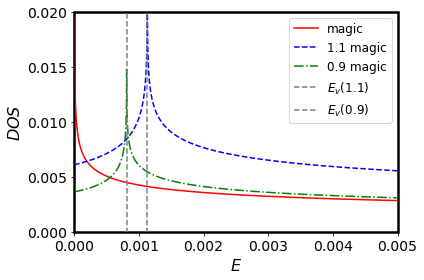

In [56]:
def DoS_Yuan(e, abgk, ev):
    alpha, beta, gamma, kappa = abgk
    tilde_gamma = mp.sqrt(gamma**2+4*alpha*kappa)
    epsilon = tilde_gamma**2*(e-ev)/alpha**3
    zplus = (beta / alpha)+mp.sqrt((beta / alpha)**2+epsilon)
    zminus =(beta / alpha)-mp.sqrt((beta / alpha)**2+epsilon)
    if alpha*beta<=0:
        rho_e = np.real(1/mp.sqrt(zminus)*mp.ellipk((1-zplus/zminus))-(2*1j/mp.sqrt(zplus))*mp.ellipk((zminus/zplus)))
    else:
        rho_e = np.real(1/mp.sqrt(zminus)*mp.ellipk((1-zplus/zminus)))
    return 1/(np.sqrt(2)*alpha*np.pi**2)*abs(rho_e)

#test for magic angle and other angles
energy_space = np.linspace(0.0, 0.005, 2000)
dos_test_magic = [DoS_Yuan(ei, abgk=[49.206920036973635, 0.10168067596553049, -1485.9730421869385, 13634.296232450133], 
                           ev= 7.176511245053104e-07) for ei in energy_space]
dos_test_11magic = [DoS_Yuan(ei, abgk = [39.35643205024167, 3.6197362340363393, 1948.7359442863424, -35019.63242761301], 
                             ev=0.0011304025004506527) for ei in energy_space]
dos_test_09magic = [DoS_Yuan(ei, abgk = [58.54868576893257, 4.799869215232628, 859.1631761639729, -55018.03418414476], 
                             ev=0.0008108047427627199) for ei in energy_space]

fig = plt.subplot(111)
plt.plot(energy_space,dos_test_magic, '-', color='red', label='magic')
plt.plot(energy_space,dos_test_11magic, '--', color='blue', label='1.1 magic')
plt.plot(energy_space,dos_test_09magic, '-.', color='green', label='0.9 magic')

plt.plot([0.0011304025004506527, 0.0011304025004506527], [-100.0, 100.0], '--', color='gray', label=r'$E_{v} (1.1)$')
plt.plot([0.0008108047427627199, 0.0008108047427627199], [-100.0, 100.0], '--', color='gray', label=r'$E_{v} (0.9)$')


standartize_figure(fig,
    axes_labels=[r"$E$", r"$DOS$"],
    rotate_ylabel=False,
    axes_limits=[0.0, 0.005, 0.0, 0.02],
    legend=True,
    legend_label=None,
    legend_position='upper right',
    legend_box=False,
    ticks_fontsize=14,
    axes_label_fontsize=16,
    ylabelpad=24,
    legend_fontsize=12)
plt.show()

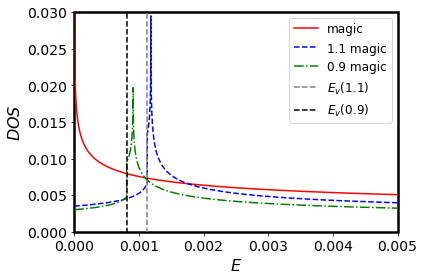

In [5]:
def DoS_Yuan(e, abgk, ev):
    alpha, beta, gamma, kappa = abgk
    tilde_gamma = mp.sqrt(gamma**2-4*alpha*kappa)
    epsilon = -tilde_gamma**2*(e-ev)/alpha**3
    zplus = -(beta / alpha)+mp.sqrt((beta / alpha)**2+epsilon)
    zminus =-(beta / alpha)-mp.sqrt((beta / alpha)**2+epsilon)
    if alpha*beta>=0:
        rho_e = np.real(1/mp.sqrt(zminus)*mp.ellipk((1-zplus/zminus))-(2*1j/mp.sqrt(zplus))*mp.ellipk((zminus/zplus)))
    else:
        rho_e = np.real(1/mp.sqrt(zminus)*mp.ellipk((1-zplus/zminus)))
    return 1/(np
              .sqrt(2)*alpha*np.pi**2)*abs(rho_e)

#test for magic angle and other angles
energy_space = np.linspace(0.0, 0.005, 2000)
dos_test_magic = [DoS_Yuan(ei, abgk=[49.206920036973635, 0.10168067596553049, -1485.9730421869385, 13634.296232450133], 
                           ev= 7.176511245053104e-07) for ei in energy_space]
dos_test_11magic = [DoS_Yuan(ei, abgk = [39.35643205024167, 3.6197362340363393, 1948.7359442863424, -35019.63242761301], 
                             ev=0.0011304025004506527) for ei in energy_space]
dos_test_09magic = [DoS_Yuan(ei, abgk = [58.54868576893257, 4.799869215232628, 859.1631761639729, -55018.03418414476], 
                             ev=0.0008108047427627199) for ei in energy_space]

fig = plt.subplot(111)
plt.plot(energy_space,dos_test_magic, '-', color='red', label='magic')
plt.plot(energy_space,dos_test_11magic, '--', color='blue', label='1.1 magic')
plt.plot(energy_space,dos_test_09magic, '-.', color='green', label='0.9 magic')

plt.plot([0.0011304025004506527, 0.0011304025004506527], [-100.0, 100.0], '--', color='gray', label=r'$E_{v} (1.1)$')
plt.plot([0.0008108047427627199, 0.0008108047427627199], [-100.0, 100.0], '--', color='black', label=r'$E_{v} (0.9)$')


standartize_figure(fig,
    axes_labels=[r"$E$", r"$DOS$"],
    rotate_ylabel=False,
    axes_limits=[0.0, 0.005, 0.0, 0.03],
    legend=True,
    legend_label=None,
    legend_position='upper right',
    legend_box=False,
    ticks_fontsize=14,
    axes_label_fontsize=16,
    ylabelpad=24,
    legend_fontsize=12)
plt.show()

In [24]:
#adding DoS of Dirac cone:
def DiracConeDoS(e, angle):
    alpha_par = 0.11*3*np.sqrt(3)/(8*np.pi*4.31075*np.sin(angle/2))
    #print(1-3*alpha_par**2)
    vFeff = ((1-3*alpha_par**2)/(1+6*alpha_par**2)) #*0.0031
    print(2/(np.pi*vFeff**2))
    return 2*abs(e)/(np.pi*vFeff**2)

In [25]:
print(DiracConeDoS(0.002, angle=1.1*0.0182759))
print(DiracConeDoS(0.002, angle=0.9*0.0182759))

148.7557873183763
0.29751157463675254
139.25498517789467
0.27850997035578934


In [68]:
print(DiracConeDoS(0.002, angle=1.0*0.0182759))

1.0834145323102007e-06
1015872723880956.0


In [75]:
print(DiracConeDoS(0.001, angle=1.3*0.0182759))

0.40827330036518594
0.018208158223689163


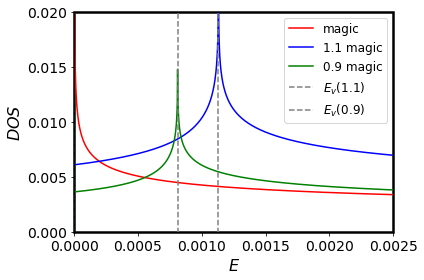

In [61]:
def DoS_Yuan(e, abgk, ev):
    alpha, beta, gamma, kappa = abgk
    tilde_gamma = mp.sqrt(gamma**2+4*alpha*kappa)
    epsilon = tilde_gamma**2*(e-ev)/alpha**3
    zplus = (beta / alpha)+mp.sqrt((beta / alpha)**2+epsilon)
    zminus =(beta / alpha)-mp.sqrt((beta / alpha)**2+epsilon)
    if alpha*beta<=0:
        rho_e = np.real(1/mp.sqrt(zminus)*mp.ellipk((1-zplus/zminus))-(2*1j/mp.sqrt(zplus))*mp.ellipk((zminus/zplus)))
    else:
        rho_e = np.real(1/mp.sqrt(zminus)*mp.ellipk((1-zplus/zminus)))
    return 1/(np.sqrt(2)*alpha*np.pi**2)*abs(rho_e)

#test for magic angle and other angles
energy_space = np.linspace(0.0, 0.005, 2000)
dos_test_magic = [DoS_Yuan(ei, abgk=[49.206920036973635, 0.10168067596553049, -1485.9730421869385, 13634.296232450133], 
                           ev= 7.176511245053104e-07) for ei in energy_space]
dos_test_11magic = [DoS_Yuan(ei, abgk = [39.35643205024167, 3.6197362340363393, 1948.7359442863424, -35019.63242761301], 
                             ev=0.0011304025004506527) for ei in energy_space]
dos_test_09magic = [DoS_Yuan(ei, abgk = [58.54868576893257, 4.799869215232628, 859.1631761639729, -55018.03418414476], 
                             ev=0.0008108047427627199) for ei in energy_space]


dos_Dirac_11magic = [DiracConeDoS(ei, angle=1.5*0.018326) for ei in energy_space]
dos_Dirac_09magic = [DiracConeDoS(ei, angle=0.5*0.018326) for ei in energy_space]

fig = plt.subplot(111)
plt.plot(energy_space,dos_test_magic, '-', color='red', label='magic')
plt.plot(energy_space,dos_test_11magic, '-', color='blue', label='1.1 magic')
plt.plot(energy_space,dos_test_09magic, '-', color='green', label='0.9 magic')

plt.plot(energy_space, dos_Dirac_11magic, '--', color='blue')
plt.plot(energy_space, dos_Dirac_09magic, '--', color='green')


plt.plot([0.0011304025004506527, 0.0011304025004506527], [-100.0, 100.0], '--', color='gray', label=r'$E_{v} (1.1)$')
plt.plot([0.0008108047427627199, 0.0008108047427627199], [-100.0, 100.0], '--', color='gray', label=r'$E_{v} (0.9)$')


standartize_figure(fig,
    axes_labels=[r"$E$", r"$DOS$"],
    rotate_ylabel=False,
    axes_limits=[0.0, 0.0025, 0.0, 0.02],
    legend=True,
    legend_label=None,
    legend_position='upper right',
    legend_box=False,
    ticks_fontsize=14,
    axes_label_fontsize=16,
    ylabelpad=24,
    legend_fontsize=12)
plt.show()

In [6]:
#dos_Dirac_11magic

### Matching dirac cone dos and normalized Yuan dos at Ev/2

In [81]:
print(DiracConeDoS(0.0011304025004506527/2, angle=1.1*0.018326))
DoS_Yuan(0.0011304025004506527/2, abgk = [39.35643205024167, 3.6197362340363393, 1948.7359442863424, -35019.63242761301], 
                             ev=0.0011304025004506527)

0.07932715227035565


mpf('0.0073149818246193666')

In [19]:
(0.07932715227035565/0.0073149818246193666)**(-1)

0.09221283778962726

In [82]:
print(DiracConeDoS(0.0008108047427627199/2, angle=0.9*0.018326))
DoS_Yuan(0.0008108047427627199/2, abgk = [58.54868576893257, 4.799869215232628, 859.1631761639729, -55018.03418414476], 
                             ev=0.0008108047427627199)

0.05938025729401609


mpf('0.0043733919639742519')

In [20]:
(0.05938025729401609 / 0.0043733919639742519)**(-1)

0.07365060650242368

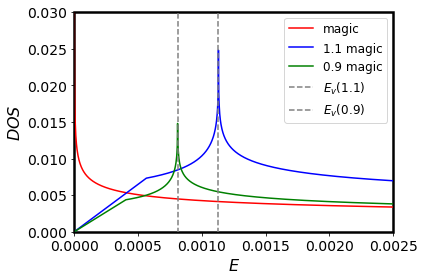

In [23]:
#matching at half E_v
def DoS_Yuan(e, abgk, ev):
    alpha, beta, gamma, kappa = abgk
    tilde_gamma = mp.sqrt(gamma**2+4*alpha*kappa)
    epsilon = tilde_gamma**2*(e-ev)/alpha**3
    zplus = (beta / alpha)+mp.sqrt((beta / alpha)**2+epsilon)
    zminus =(beta / alpha)-mp.sqrt((beta / alpha)**2+epsilon)
    if alpha*beta<=0:
        rho_e = np.real(1/mp.sqrt(zminus)*mp.ellipk((1-zplus/zminus))-(2*1j/mp.sqrt(zplus))*mp.ellipk((zminus/zplus)))
    else:
        rho_e = np.real(1/mp.sqrt(zminus)*mp.ellipk((1-zplus/zminus)))
    return 1/(np.sqrt(2)*alpha*np.pi**2)*abs(rho_e)

#test for magic angle and other angles
energy_space = np.linspace(0.0, 0.005, 2000)
dos_test_magic = [DoS_Yuan(ei, abgk=[49.206920036973635, 0.10168067596553049, -1485.9730421869385, 13634.296232450133], 
                           ev= 7.176511245053104e-07) for ei in energy_space]
dos_test_magic_v2 = [DoS_Yuan(ei, abgk=[49.206920036973635, 0.0001, -1485.9730421869385, 13634.296232450133], 
                           ev= 7.176511245053104e-07) for ei in energy_space]

dos_test_11magic = [DoS_Yuan(ei, abgk = [39.35643205024167, 3.6197362340363393, 1948.7359442863424, -35019.63242761301], 
                             ev=0.0011304025004506527) if ei>=0.0011304025004506527/2 else 0.09221283778962726*DiracConeDoS(ei, angle=1.1*0.018326) for ei in energy_space]
dos_test_09magic = [DoS_Yuan(ei, abgk = [58.54868576893257, 4.799869215232628, 859.1631761639729, -55018.03418414476], 
                             ev=0.0008108047427627199) if ei>=0.0008108047427627199/2 else 0.07365060650242368*DiracConeDoS(ei, angle=0.9*0.018326) for ei in energy_space]


#dos_Dirac_11magic = [DiracConeDoS(ei, angle=1.5*0.018326) for ei in energy_space]
#dos_Dirac_09magic = [DiracConeDoS(ei, angle=0.5*0.018326) for ei in energy_space]

fig = plt.subplot(111)
plt.plot(energy_space,dos_test_magic, '-', color='red', label='magic')
#plt.plot(energy_space,dos_test_magic_v2, '-', color='cyan', label='magic beta=0')

plt.plot(energy_space,dos_test_11magic, '-', color='blue', label='1.1 magic')
plt.plot(energy_space,dos_test_09magic, '-', color='green', label='0.9 magic')

#plt.plot(energy_space, dos_Dirac_11magic, '--', color='blue')
#plt.plot(energy_space, dos_Dirac_09magic, '--', color='green')


plt.plot([0.0011304025004506527, 0.0011304025004506527], [-100.0, 100.0], '--', color='gray', label=r'$E_{v} (1.1)$')
plt.plot([0.0008108047427627199, 0.0008108047427627199], [-100.0, 100.0], '--', color='gray', label=r'$E_{v} (0.9)$')


standartize_figure(fig,
    axes_labels=[r"$E$", r"$DOS$"],
    rotate_ylabel=False,
    axes_limits=[-0.000, 0.0025, 0.0, 0.03],
    legend=True,
    legend_label=None,
    legend_position='upper right',
    legend_box=False,
    ticks_fontsize=14,
    axes_label_fontsize=16,
    ylabelpad=24,
    legend_fontsize=12)
plt.show()

In [11]:
print(DiracConeDoS(0.001131, angle=1.1*0.018326))
DoS_Yuan(0.001131, abgk = [39.35643205024167, 3.6197362340363393, 1948.7359442863424, -35019.63242761301], 
                             ev=0.0011304025004506527)

0.1587381648253686


mpf('0.013361542832763479')

In [15]:
(0.1587381648253686/0.013361542832763479)**-1

0.08417347427106021

In [26]:
print(DiracConeDoS(0.000811, angle=1.1*0.018326))
print(DiracConeDoS(0.000811, angle=0.9*0.018326))

140.35204670678036
0.11382550987919887
146.47239751382062
0.11878911438370851


In [13]:
print(DiracConeDoS(0.000811, angle=0.9*0.018326))
DoS_Yuan(0.000811, abgk = [58.54868576893257, 4.799869215232628, 859.1631761639729, -55018.03418414476], 
                             ev=0.0008108047427627199)

0.11878911438370851


mpf('0.0094974622975058636')

In [16]:
(0.11878911438370851/0.0094974622975058636)**(-1)

0.07995229484435322

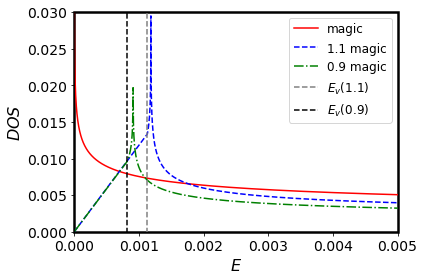

In [18]:
#matching at E_v
def DoS_Yuan(e, abgk, ev):
    alpha, beta, gamma, kappa = abgk
    tilde_gamma = mp.sqrt(gamma**2-4*alpha*kappa)
    epsilon = -tilde_gamma**2*(e-ev)/alpha**3
    zplus = -(beta / alpha)+mp.sqrt((beta / alpha)**2+epsilon)
    zminus =-(beta / alpha)-mp.sqrt((beta / alpha)**2+epsilon)
    if alpha*beta>=0:
        rho_e = np.real(1/mp.sqrt(zminus)*mp.ellipk((1-zplus/zminus))-(2*1j/mp.sqrt(zplus))*mp.ellipk((zminus/zplus)))
    else:
        rho_e = np.real(1/mp.sqrt(zminus)*mp.ellipk((1-zplus/zminus)))
    return 1/(np
              .sqrt(2)*alpha*np.pi**2)*abs(rho_e)

#test for magic angle and other angles
energy_space = np.linspace(0.0, 0.005, 2000)
dos_test_magic = [DoS_Yuan(ei, abgk=[49.206920036973635, 0.10168067596553049, -1485.9730421869385, 13634.296232450133], 
                           ev= 7.176511245053104e-07) for ei in energy_space]
dos_test_11magic = [DoS_Yuan(ei, abgk = [39.35643205024167, 3.6197362340363393, 1948.7359442863424, -35019.63242761301], 
                             ev=0.0011304025004506527) if ei>=0.0011304025004506527 else 0.08417347427106021*DiracConeDoS(ei, angle=1.1*0.018326) for ei in energy_space]
dos_test_09magic = [DoS_Yuan(ei, abgk = [58.54868576893257, 4.799869215232628, 859.1631761639729, -55018.03418414476], 
                             ev=0.0008108047427627199) if ei>=0.0008108047427627199 else 0.07995229484435322*DiracConeDoS(ei, angle=0.9*0.018326) for ei in energy_space]

fig = plt.subplot(111)
plt.plot(energy_space,dos_test_magic, '-', color='red', label='magic')
plt.plot(energy_space,dos_test_11magic, '--', color='blue', label='1.1 magic')
plt.plot(energy_space,dos_test_09magic, '-.', color='green', label='0.9 magic')

plt.plot([0.0011304025004506527, 0.0011304025004506527], [-100.0, 100.0], '--', color='gray', label=r'$E_{v} (1.1)$')
plt.plot([0.0008108047427627199, 0.0008108047427627199], [-100.0, 100.0], '--', color='black', label=r'$E_{v} (0.9)$')


standartize_figure(fig,
    axes_labels=[r"$E$", r"$DOS$"],
    rotate_ylabel=False,
    axes_limits=[0.0, 0.005, 0.0, 0.03],
    legend=True,
    legend_label=None,
    legend_position='upper right',
    legend_box=False,
    ticks_fontsize=14,
    axes_label_fontsize=16,
    ylabelpad=24,
    legend_fontsize=12)
plt.show()